Importing Modules

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from scipy.spatial.distance import cdist
from tqdm import tqdm
from collections import Counter
import cv2 as cv
import os 
import shutil
from os import listdir
from os.path import isfile, join
sns.set_style("darkgrid")

## Question 1

Converting data in a readable form

In [44]:
columns =  	['Class','Alcohol'
 	,'Malic acid'
 	,'Ash'
	,'Alcalinity of ash'  
 	,'Magnesium'
	,'Total phenols'
 	,'Flavanoids'
 	,'Nonflavanoid phenols'
 	,'Proanthocyanins'
	,'Color intensity'
 	,'Hue'
 	,'OD of diluted wines'
 	,'Proline' ]

In [45]:
df = pd.read_csv('wine.data')

In [46]:
df.columns = columns

Part a

In [47]:
df.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    13.20        1.78  2.14               11.2        100   
1      1    13.16        2.36  2.67               18.6        101   
2      1    14.37        1.95  2.50               16.8        113   
3      1    13.24        2.59  2.87               21.0        118   
4      1    14.20        1.76  2.45               15.2        112   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.65        2.76                  0.26             1.28   
1           2.80        3.24                  0.30             2.81   
2           3.85        3.49                  0.24             2.18   
3           2.80        2.69                  0.39             1.82   
4           3.27        3.39                  0.34             1.97   

   Color intensity   Hue  OD of diluted wines  Proline  
0             4.38  1.05                 3.40     1050  
1             5.68  1.03                 3.17     1185  
2             7.80  0.86                 3.45     1480  
3             4.32  1.04                 2.93      735  
4             6.75  1.05                 2.85     1450

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 177 non-null    int64  
 1   Alcohol               177 non-null    float64
 2   Malic acid            177 non-null    float64
 3   Ash                   177 non-null    float64
 4   Alcalinity of ash     177 non-null    float64
 5   Magnesium             177 non-null    int64  
 6   Total phenols         177 non-null    float64
 7   Flavanoids            177 non-null    float64
 8   Nonflavanoid phenols  177 non-null    float64
 9   Proanthocyanins       177 non-null    float64
 10  Color intensity       177 non-null    float64
 11  Hue                   177 non-null    float64
 12  OD of diluted wines   177 non-null    float64
 13  Proline               177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [49]:
df.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    13.20        1.78  2.14               11.2        100   
1      1    13.16        2.36  2.67               18.6        101   
2      1    14.37        1.95  2.50               16.8        113   
3      1    13.24        2.59  2.87               21.0        118   
4      1    14.20        1.76  2.45               15.2        112   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.65        2.76                  0.26             1.28   
1           2.80        3.24                  0.30             2.81   
2           3.85        3.49                  0.24             2.18   
3           2.80        2.69                  0.39             1.82   
4           3.27        3.39                  0.34             1.97   

   Color intensity   Hue  OD of diluted wines  Proline  
0             4.38  1.05                 3.40     1050  
1             5.68  1.03                 3.17     1185  
2             7.80  0.86                 3.45     1480  
3             4.32  1.04                 2.93      735  
4             6.75  1.05                 2.85     1450

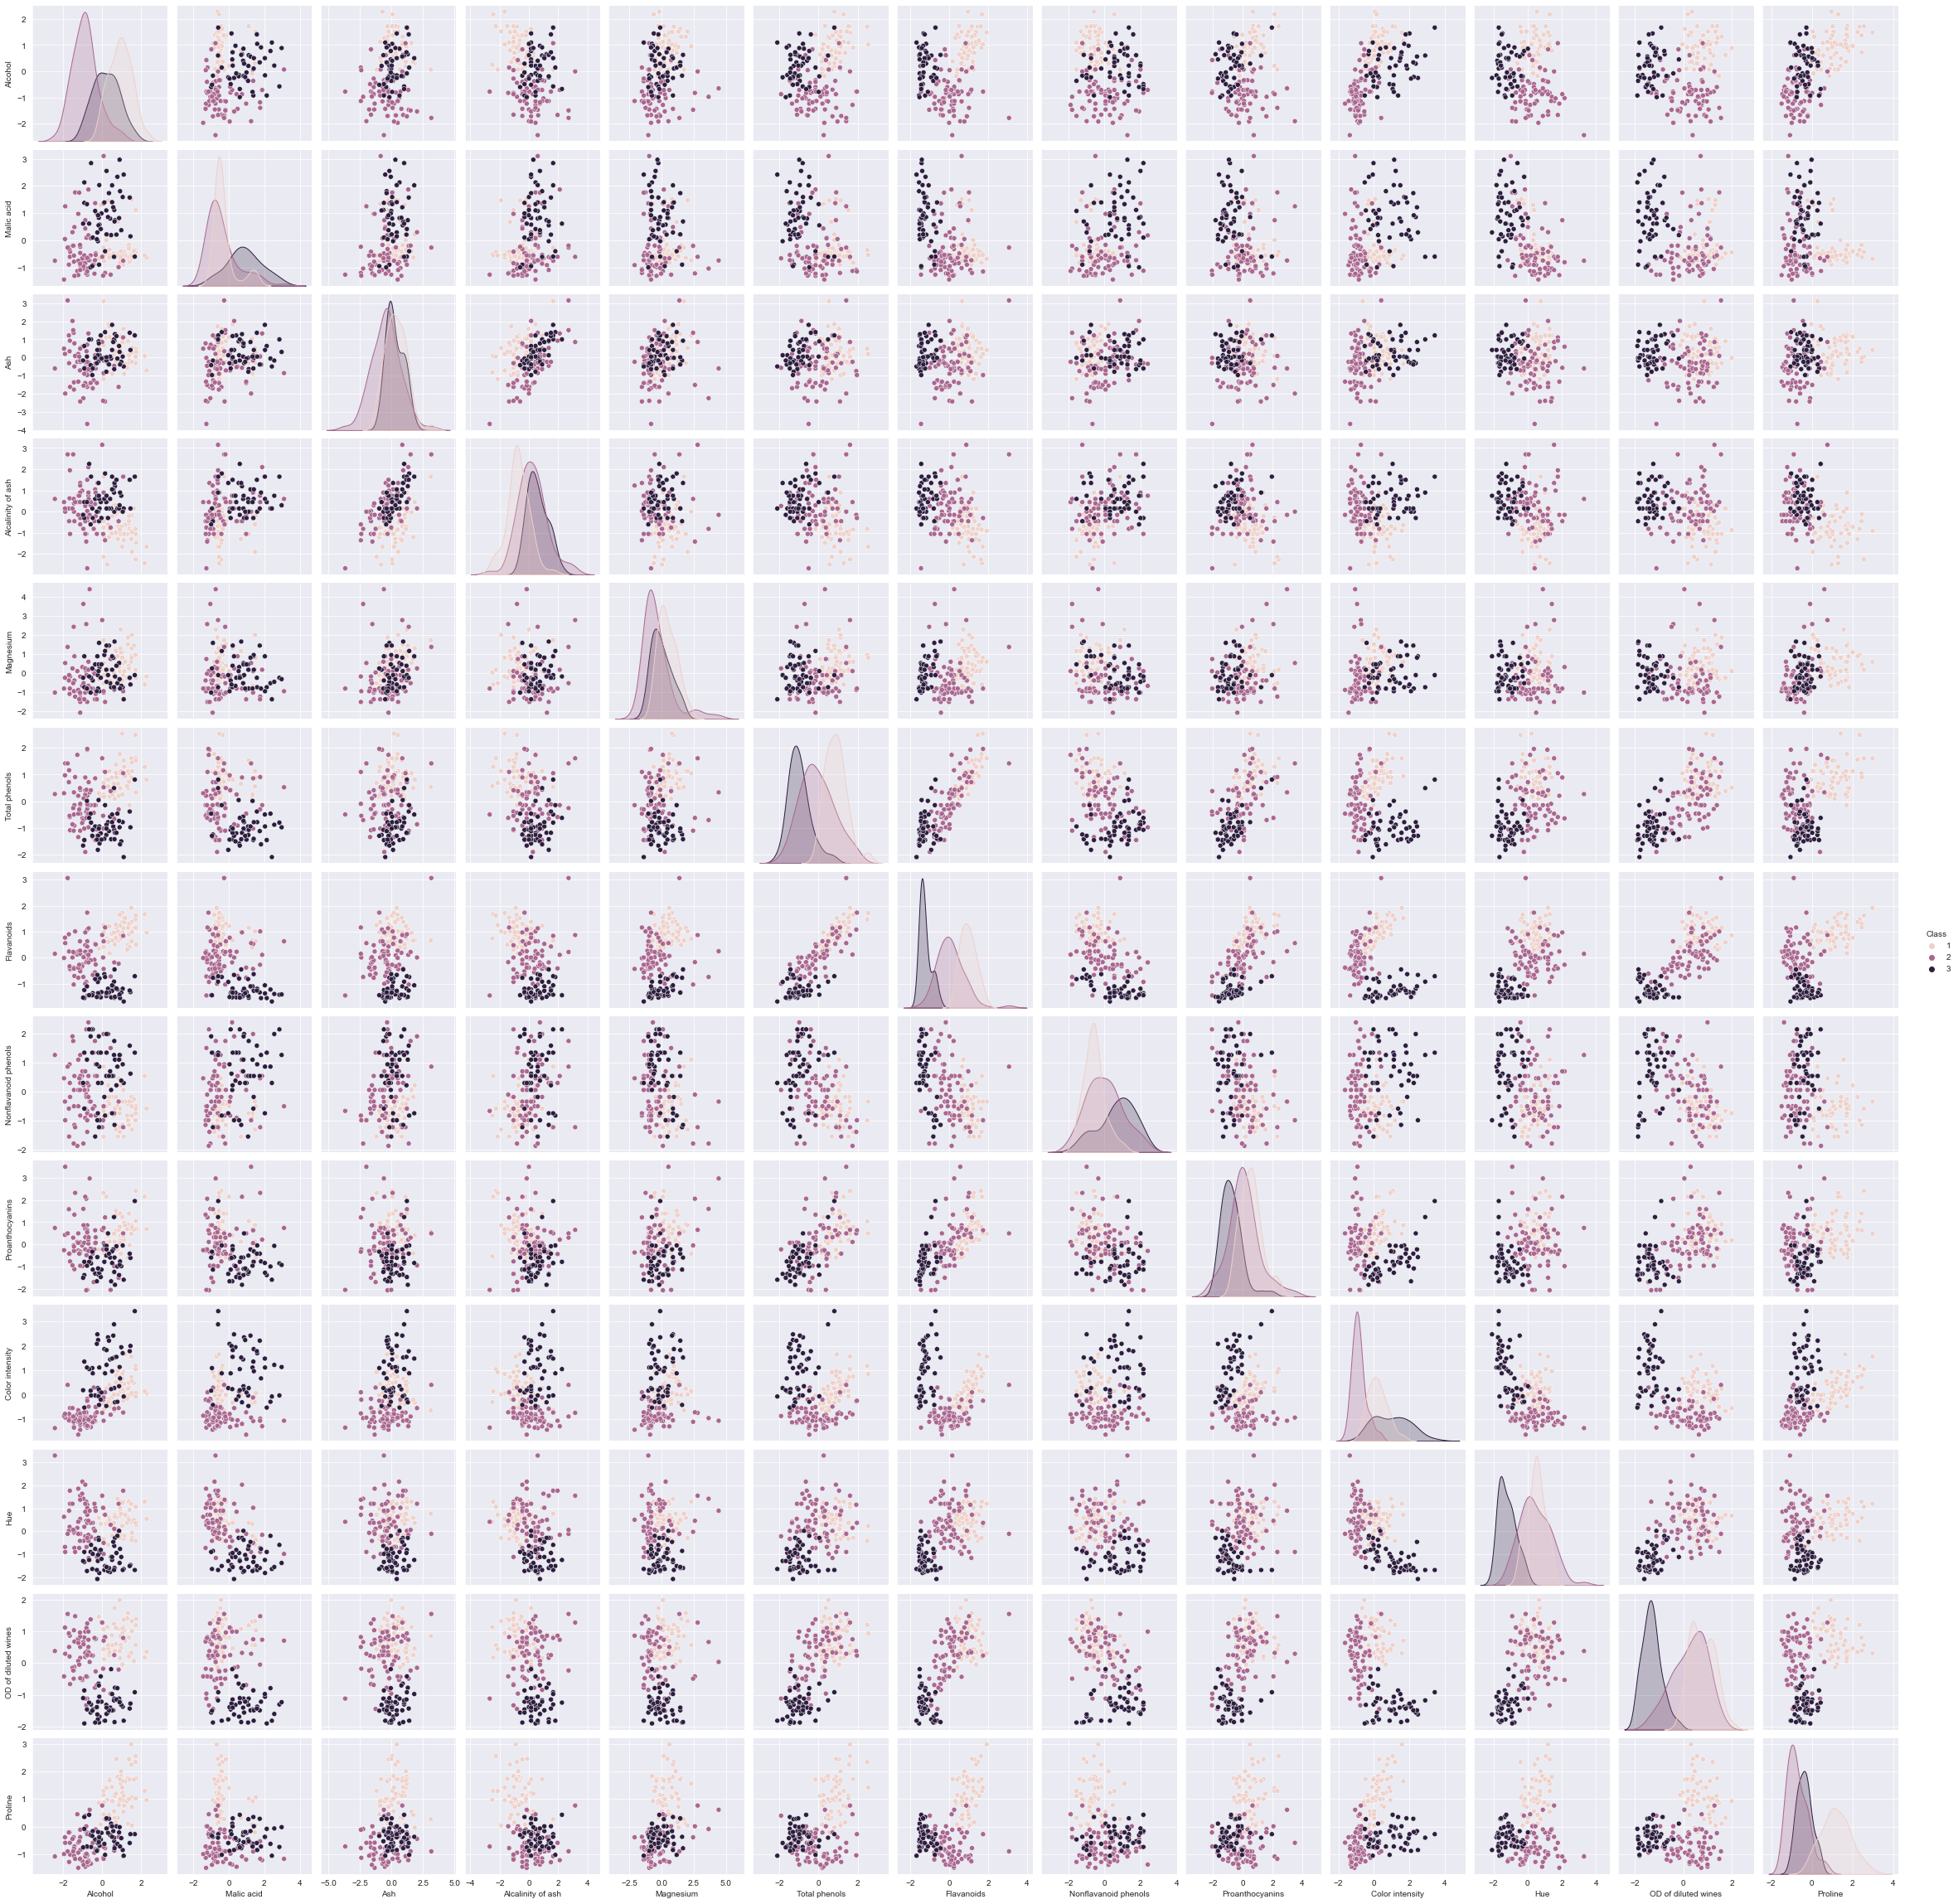

In [55]:
sns.pairplot(df, hue = 'Class')

<AxesSubplot:>

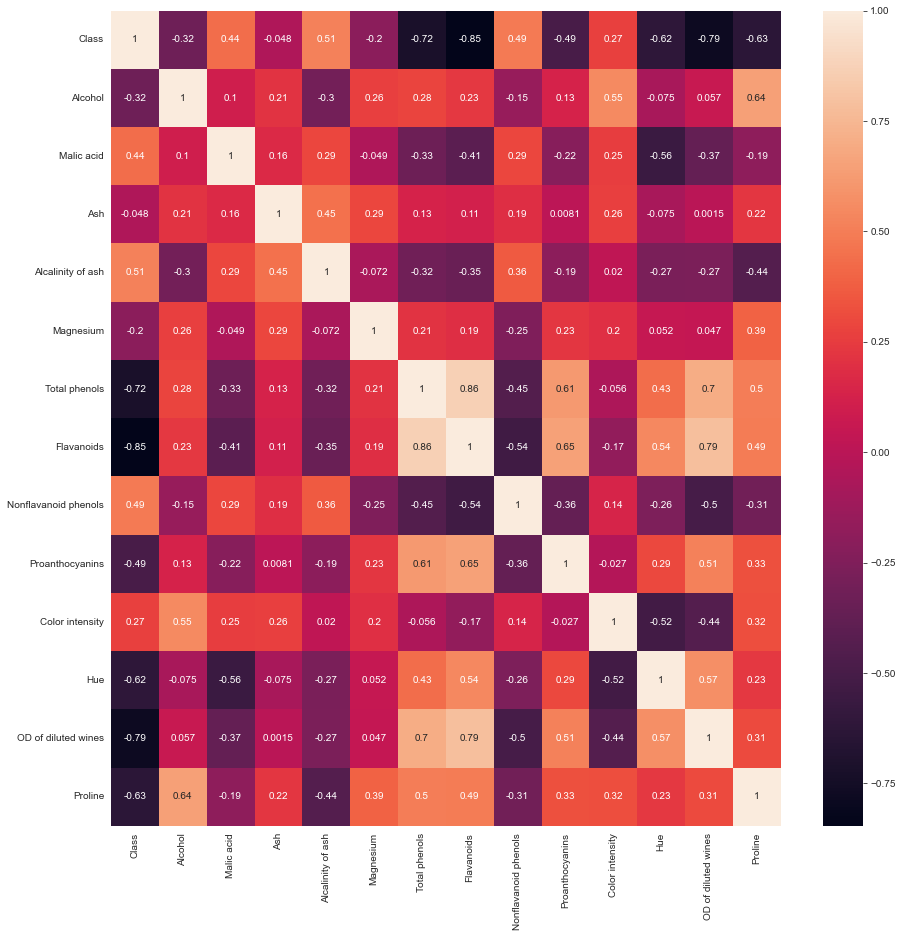

In [56]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)

In [51]:
standardSca = preprocessing.StandardScaler()
df.iloc[:,1:] = standardSca.fit_transform(df.iloc[:,1:])

In [52]:
pca = decomposition.PCA(2)

In [53]:
XTemp = pca.fit_transform(df.iloc[:,1:])
dfPCA = pd.DataFrame(XTemp)
dfPCA.columns = ['PC1','PC2'] 

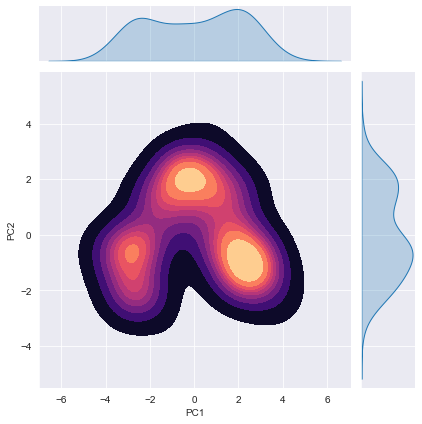

In [54]:
sns.jointplot(x = 'PC1', y = 'PC2', kind = 'kde',data  = dfPCA, fill = True, cmap = 'magma')
## The below KDE plot shows that the optimum value for k should be 3 ( for the k means clustering algorithm)
## Darker circles show concentration of points which proves the presence of a class ideally.

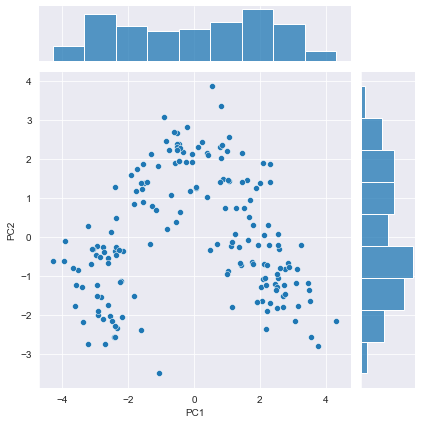

In [12]:
sns.jointplot(x = 'PC1', y = 'PC2', kind = 'scatter',data  = dfPCA, cmap = 'magma')
## The below Scatter plot too shows that the optimum value for k should be 3 ( for the k means clustering algorithm)

Part B

In [13]:
kmeans = cluster.KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(np.array(dfPCA.values))

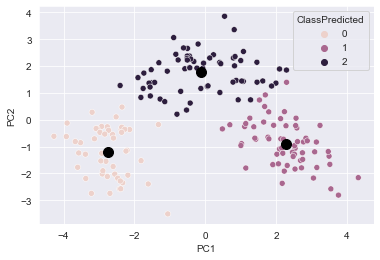

In [14]:
dfPCA['ClassPredicted'] = kmeans.labels_
df['ClassPredicted'] = kmeans.labels_
sns.scatterplot(x = 'PC1', y = 'PC2', data  = dfPCA, cmap = 'light', hue = 'ClassPredicted')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
## Black dots represent the centroids.

Part C

In [35]:
Si_score = metrics.silhouette_score

In [16]:
x = dfPCA.iloc[:,:-1]

In [17]:
clusters = [i+1 for i in range(1,10)]
results = []
for i in clusters:
  kmeans = cluster.KMeans(n_clusters = i)
  y_kmeans = kmeans.fit_predict(np.array(x))
  results.append(Si_score(x,y_kmeans))

In [18]:
dfResults = pd.DataFrame()
dfResults['Clusters'] = clusters
dfResults['Silhouette Score'] = results

<AxesSubplot:xlabel='Clusters', ylabel='Silhouette Score'>

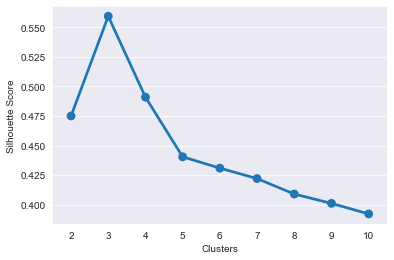

In [19]:
sns.pointplot(x = 'Clusters', y = 'Silhouette Score', data = dfResults)
## We get the highest Score for Clusters = 3
## silhouette analysis can be used to study the separation distance between the resulting clusters. 
## The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters
## and thus provides a way to assess parameters like number of clusters visually. Score ranges from -1 to 1.
## Closer to 1 is a better score.

##### Part D

In [20]:
k = np.arange(2,11,1)
inertias = []
for clusterN in k:
    kmeans = cluster.KMeans(n_clusters = clusterN)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

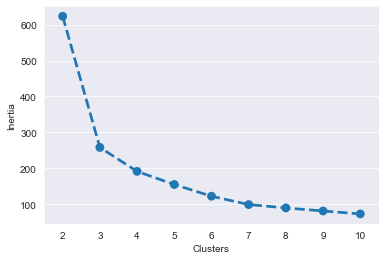

In [21]:
'''
Plotting elbow plot (Inertia based)
'''
dfPlot = pd.DataFrame()
dfPlot['Inertia'] = inertias
dfPlot['Clusters'] = [i for i in range(2,11)]
ax = sns.pointplot(x = 'Clusters', y = 'Inertia', data = dfPlot)
ax.lines[0].set_linestyle("--")

#As we can see elbow occurs at clusters = 3
#which implies 3 is the optimal value for the number of clusters


## Question 2

##### Part A and B

In [24]:
class kmeans:
    def __init__(self,dis='euclidean',clusters = 2, tolerance = 1e-7, Initialise = False,centroids = None): ## 'centroids' parameter enables user to take initial cluster center points as its initialization. (iii)
        self.clusters = clusters ## Taking value from user for k (by default k = 2) (ii)
        self.dis = dis
        self.centroids = centroids ## Stroing Centroids (i)4
        self.Initialise = Initialise
        self.vals = None
        self.tolerance = tolerance
        self.Data = None
    def distance(self,a,b):
        if self.dis == 'euclidean':
            return np.sum((a-b)**2)**0.5
        if self.dis == 'absolute':
            return np.sum(abs(a-b))
    def adjustCentroids(self,centroids, X,y): ## Function to adjust the centroids after every iteration
        centers = centroids.shape[0]
        for i in range(centers):
            centroids[i] = np.mean(X[y==i].copy(), axis=0)
        return centroids
    def fit(self,X, iterations = 100):
        self.vals = np.zeros(X.shape[0])
        self.Data = X
        if self.Initialise == False:
            self.centroids = np.zeros((self.clusters,X.shape[1]))
            for i in range(self.clusters):
                self.centroids[i] = X[np.random.randint(0,X.shape[0])]
        for it in tqdm(range(iterations)): ## Stops iterating after iterations specified by the user
            for ix,row in enumerate(X):
                center = -1
                dist = float("inf")
                for cx,centr in enumerate(self.centroids):
                    if self.distance(row,centr) < dist:
                        dist = self.distance(row,centr)
                        self.vals[ix] = cx
            centroidsPrev = self.centroids.copy()
            self.centroids = self.adjustCentroids(self.centroids,X,self.vals)
            if self.distance(centroidsPrev, self.centroids) < self.tolerance:
                break
            ## Breaks after sum < tolerance
    def SSE_cluster(self,cluster):
        Xc = self.Data[self.vals == cluster].copy()
        centroid = self.centroids[cluster].copy()
        Xc = Xc - centroid
        Xc = Xc ** 2
        Xc = np.sum(Xc, axis = 1)
        return float(np.sum(Xc))
    def SSE(self):
        sum_ = 0
        for i in self.clusters:
            sum_ += self.SSE_cluster(i)
        return sum_
        
        

##### Part C

In [25]:
'''
Initialising a kmeans model with clusters = 10 and distance metric as 'euclidean'
'''
kMeans = kmeans('euclidean',10)

In [26]:
'''
Preparing data for the kmeans model
'''
df = pd.read_csv('fashion-mnist_train.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
'''
Scaling down the data from 0 to 1 and changing type to float.
'''
X = df.iloc[:,1:].values.astype('float64') / 255
y = df['label']

In [27]:
'''
Fitting model
'''
kMeans.fit(X)

100%|██████████| 100/100 [15:11<00:00,  9.12s/it]


In [28]:
'''
Reporting points in each cluster
'''
for i in Counter(kMeans.vals):
    print('Cluster:',i,'==>',Counter(kMeans.vals)[i])

Cluster: 1.0 ==> 2341
Cluster: 7.0 ==> 4354
Cluster: 4.0 ==> 9697
Cluster: 2.0 ==> 7408
Cluster: 5.0 ==> 7575
Cluster: 9.0 ==> 2583
Cluster: 3.0 ==> 2860
Cluster: 8.0 ==> 7601
Cluster: 0.0 ==> 6528
Cluster: 6.0 ==> 9053


##### Part D

In [29]:
'''
Visualising Centroids
'''
'''
Reducing dimensionality of the Data to plot its 2D graph
'''
pc = decomposition.PCA(2)
pc.fit(X)
XPCA = pc.transform(X)
centroids = pc.transform(kMeans.centroids)

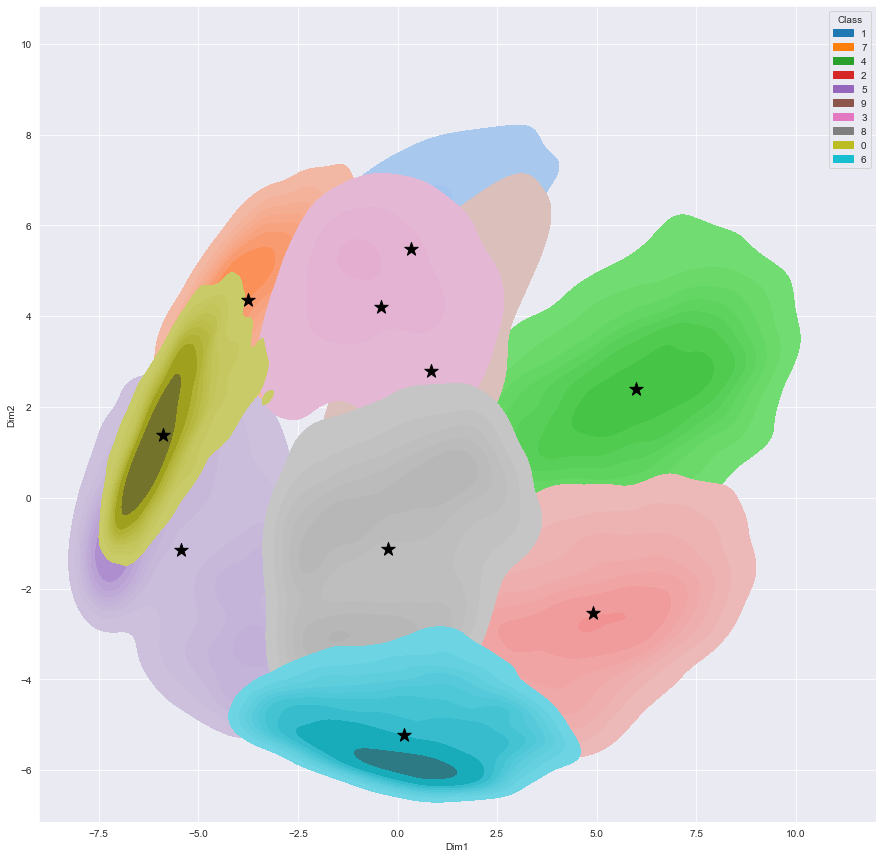

In [30]:
'''
Storing data in dataframe
'''
dicClasses = {}
dicClasses[0] = '0'
dicClasses[1] = '1'
dicClasses[2] = '2'
dicClasses[3] = '3'
dicClasses[4] = '4'
dicClasses[5] = '5'
dicClasses[6] = '6'
dicClasses[7] = '7'
dicClasses[8] = '8'
dicClasses[9] = '9'
yPlot = kMeans.vals.copy()
y = list(kMeans.vals.copy())
for ix,i in enumerate(kMeans.vals):
    y[ix] = dicClasses[i]
'''
Plotting a KDE plot 
'''
dfPlot = pd.DataFrame()
dfPlot['Dim1'] = XPCA[:,0]
dfPlot['Dim2'] = XPCA[:,1]
dfPlot['Class'] = y
fig = plt.figure(figsize=(15,15))
sns.kdeplot(x = 'Dim1', y = 'Dim2',hue = 'Class', data = dfPlot, fill = True)
plt.scatter(x = centroids[:,0], y = centroids[:,1], c = 'black', s = 200, marker = '*')


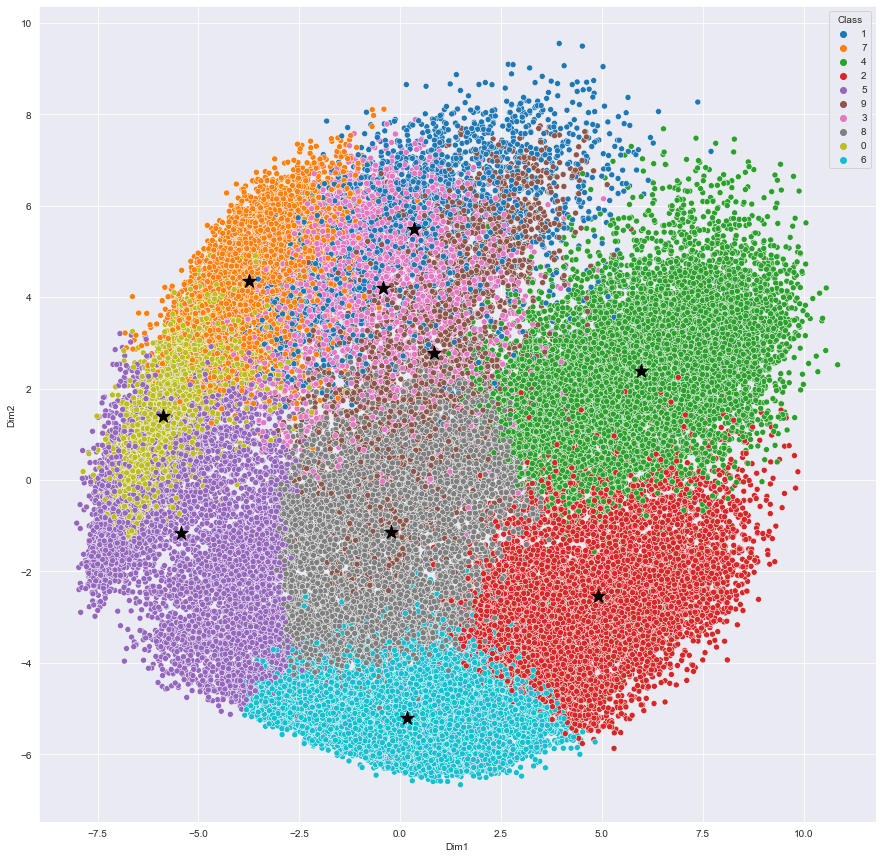

In [31]:
'''
Plotting a Scatter plot 
'''
fig = plt.figure(figsize=(15,15))
sns.scatterplot(x = 'Dim1', y = 'Dim2',hue = 'Class', data = dfPlot)
plt.scatter(x = centroids[:,0], y = centroids[:,1], c = 'black', s = 200, marker = '*')

##### Part E

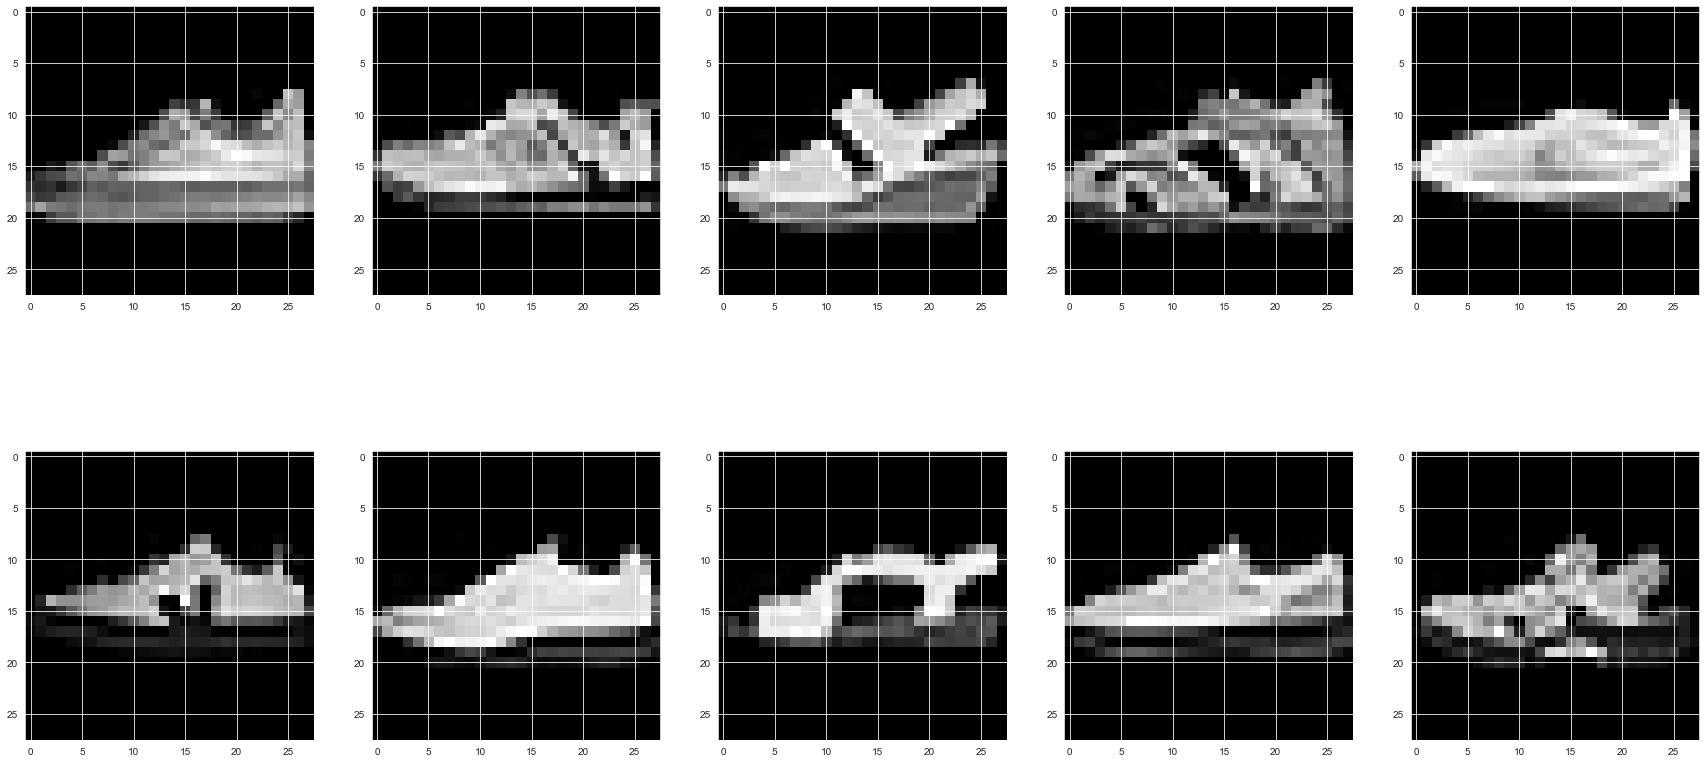

In [32]:
'''
Plotting 10 images corresponding to each cluster.
'''
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 0][5*r + c].reshape(28,28,1), cmap = 'gray')

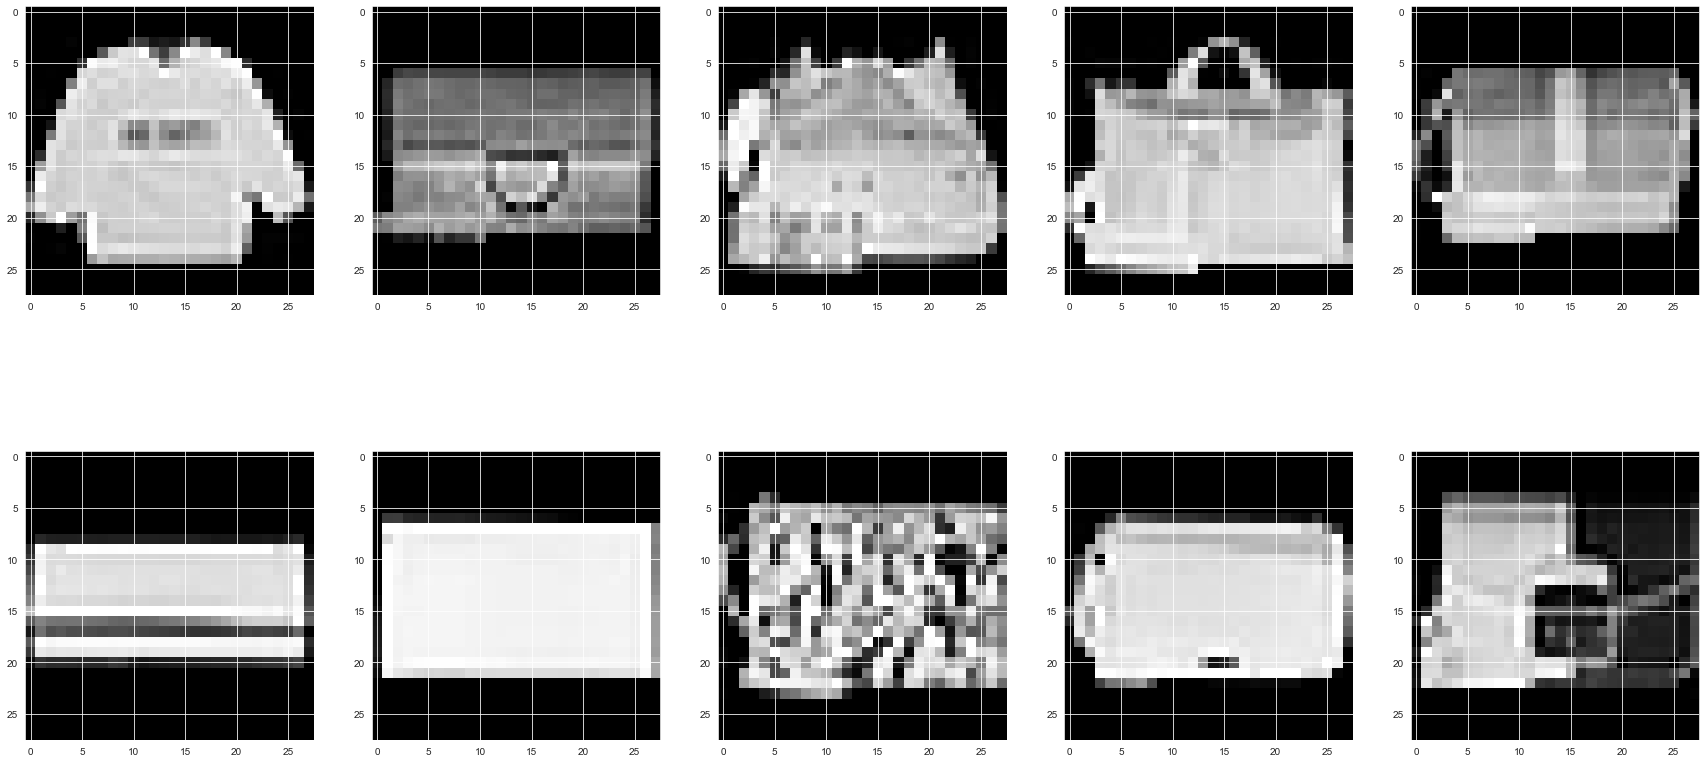

In [33]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 1][5*r + c].reshape(28,28,1), cmap = 'gray')

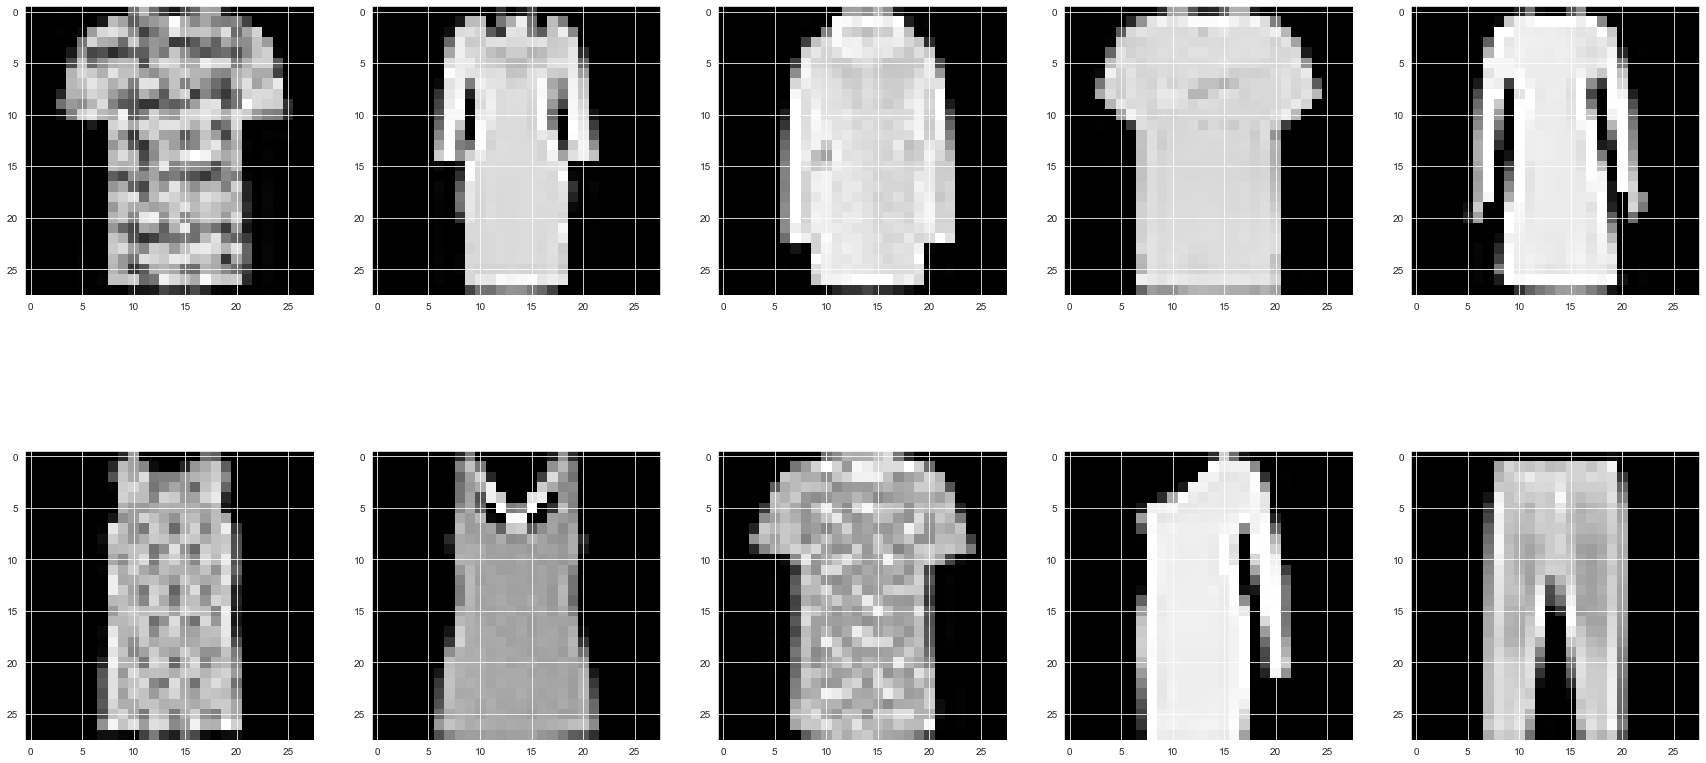

In [34]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 2][5*r + c].reshape(28,28,1), cmap = 'gray')

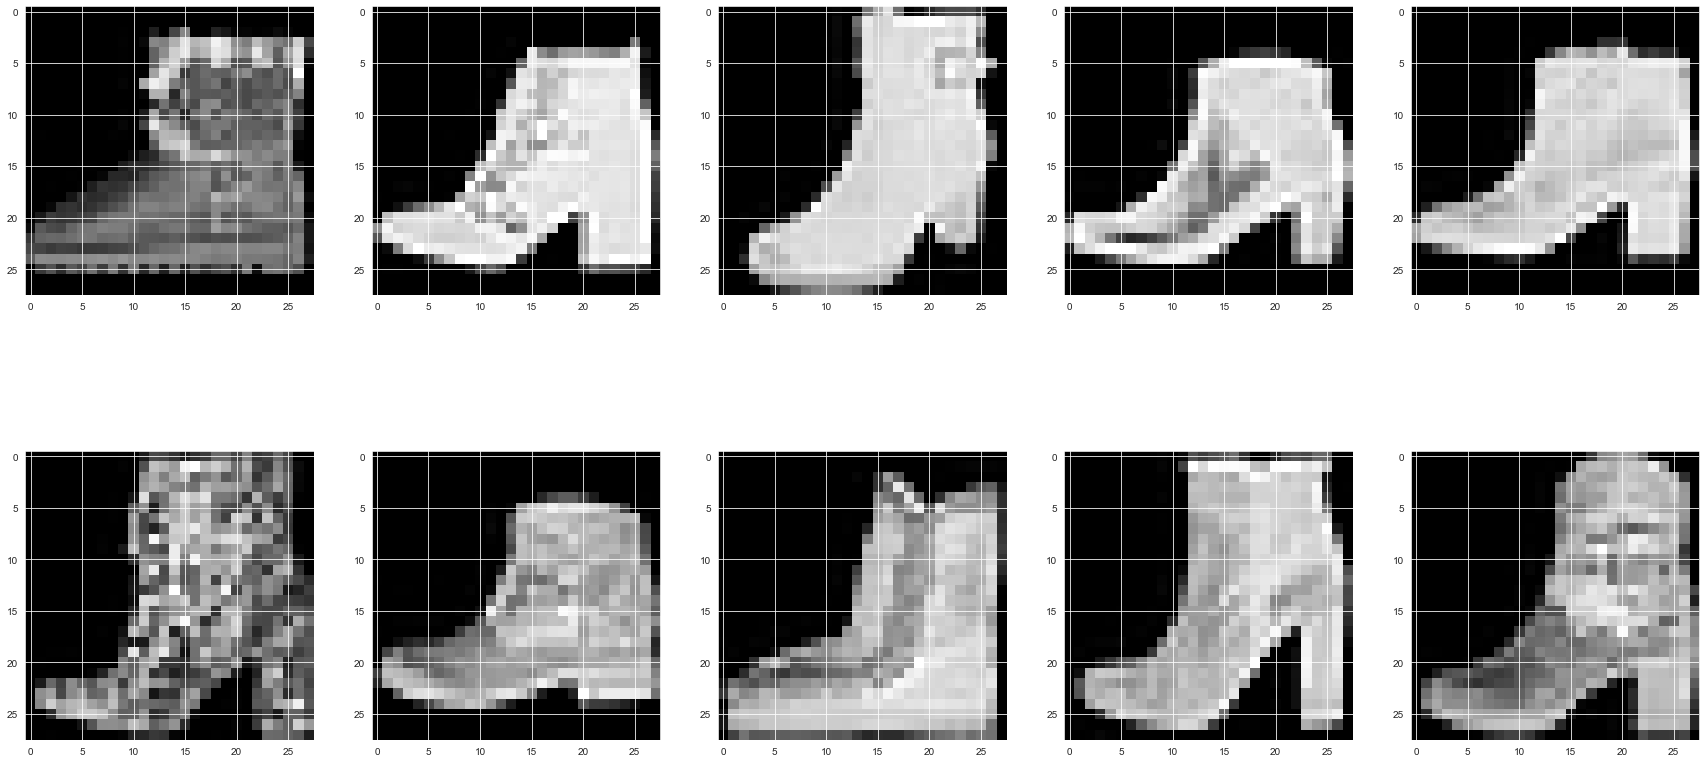

In [35]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 3][5*r + c].reshape(28,28,1), cmap = 'gray')

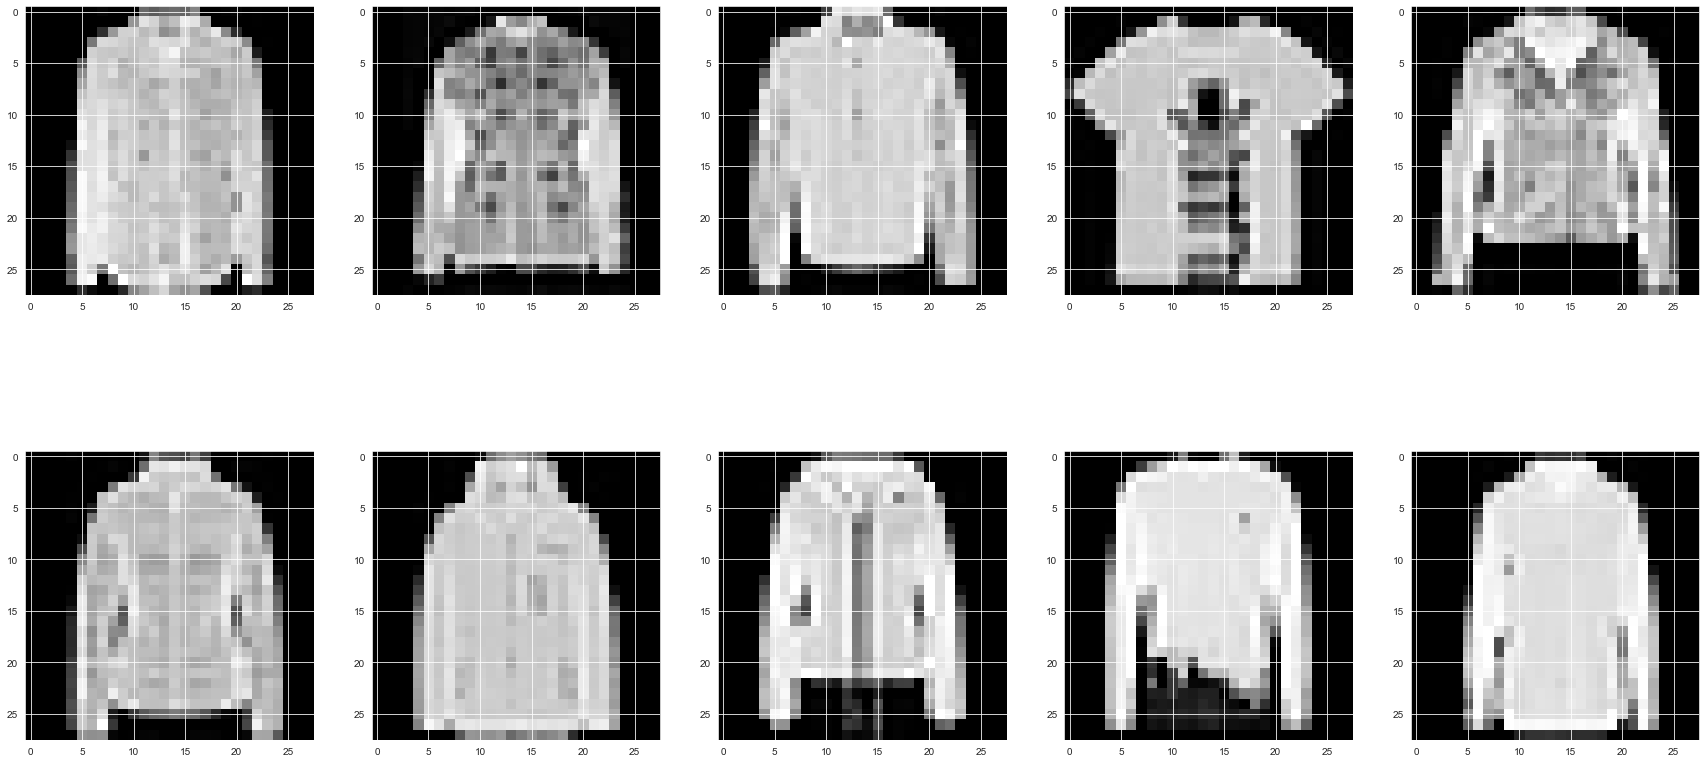

In [36]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 4][5*r + c].reshape(28,28,1), cmap = 'gray')

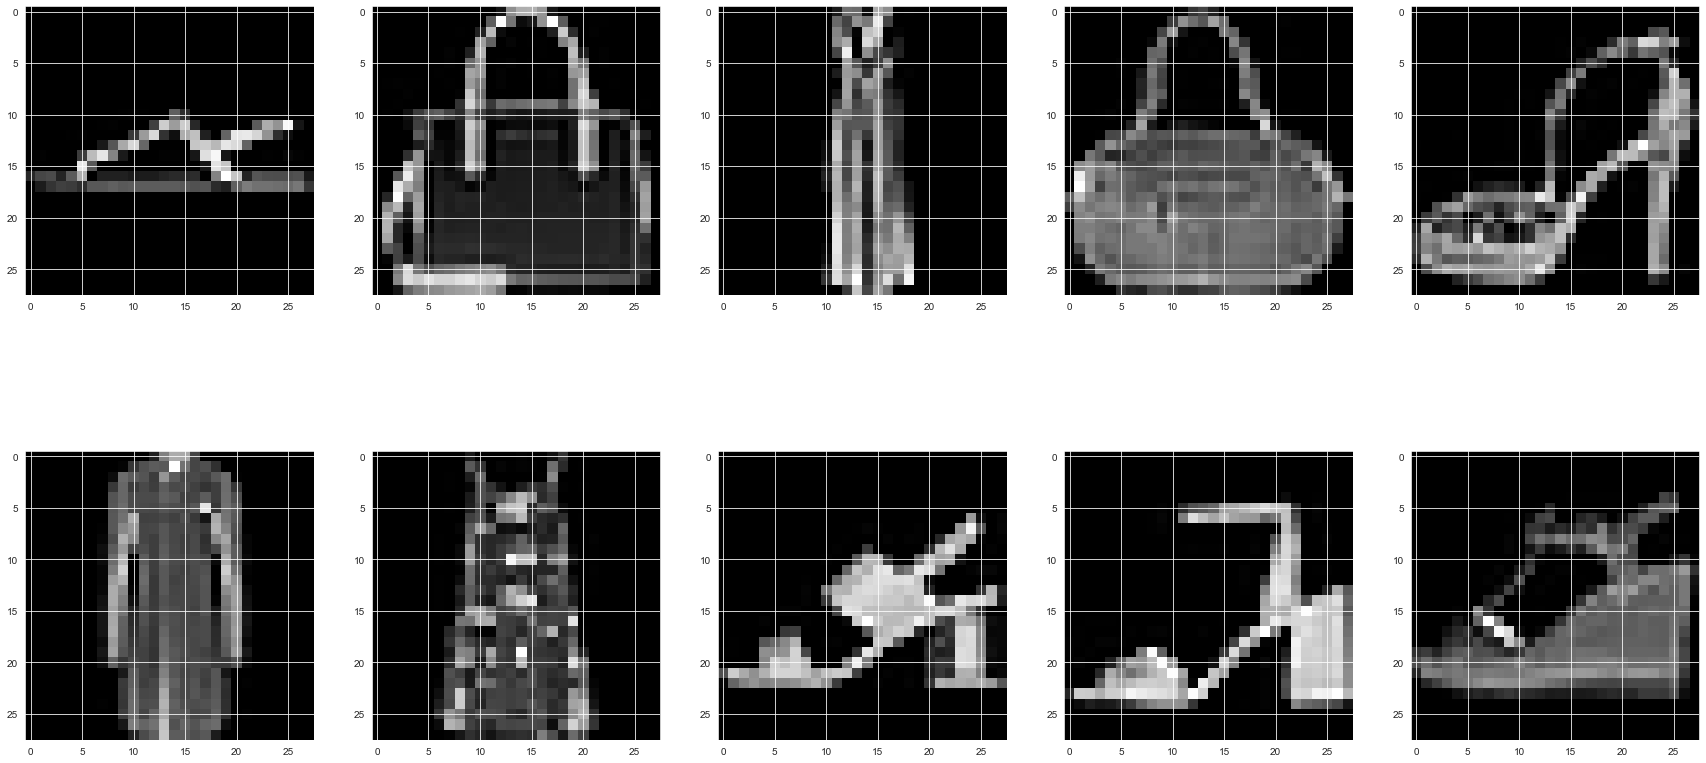

In [37]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 5][5*r + c].reshape(28,28,1), cmap = 'gray')

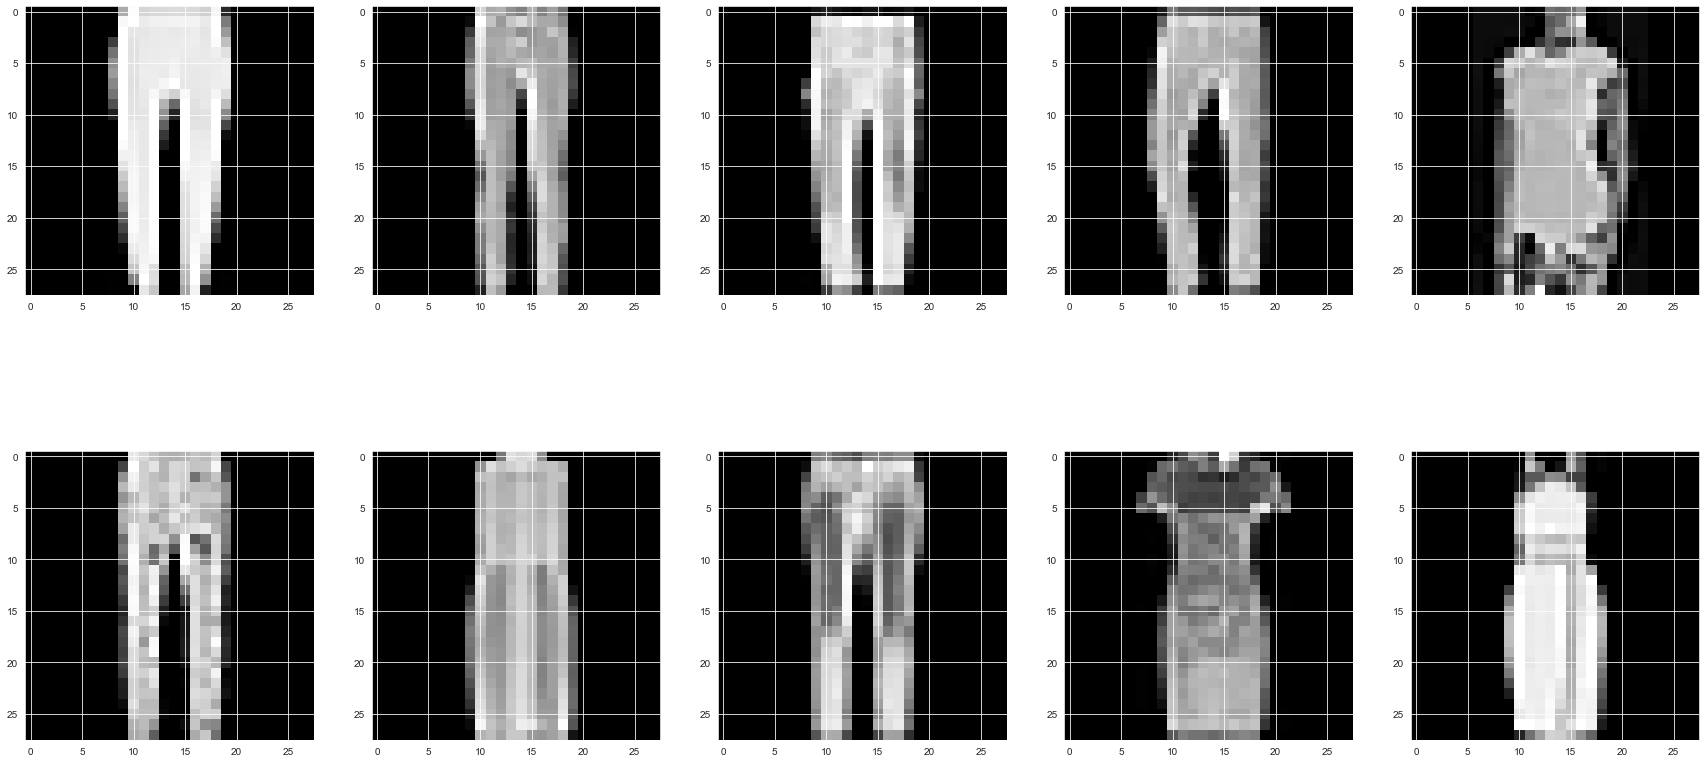

In [38]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 6][5*r + c].reshape(28,28,1), cmap = 'gray')

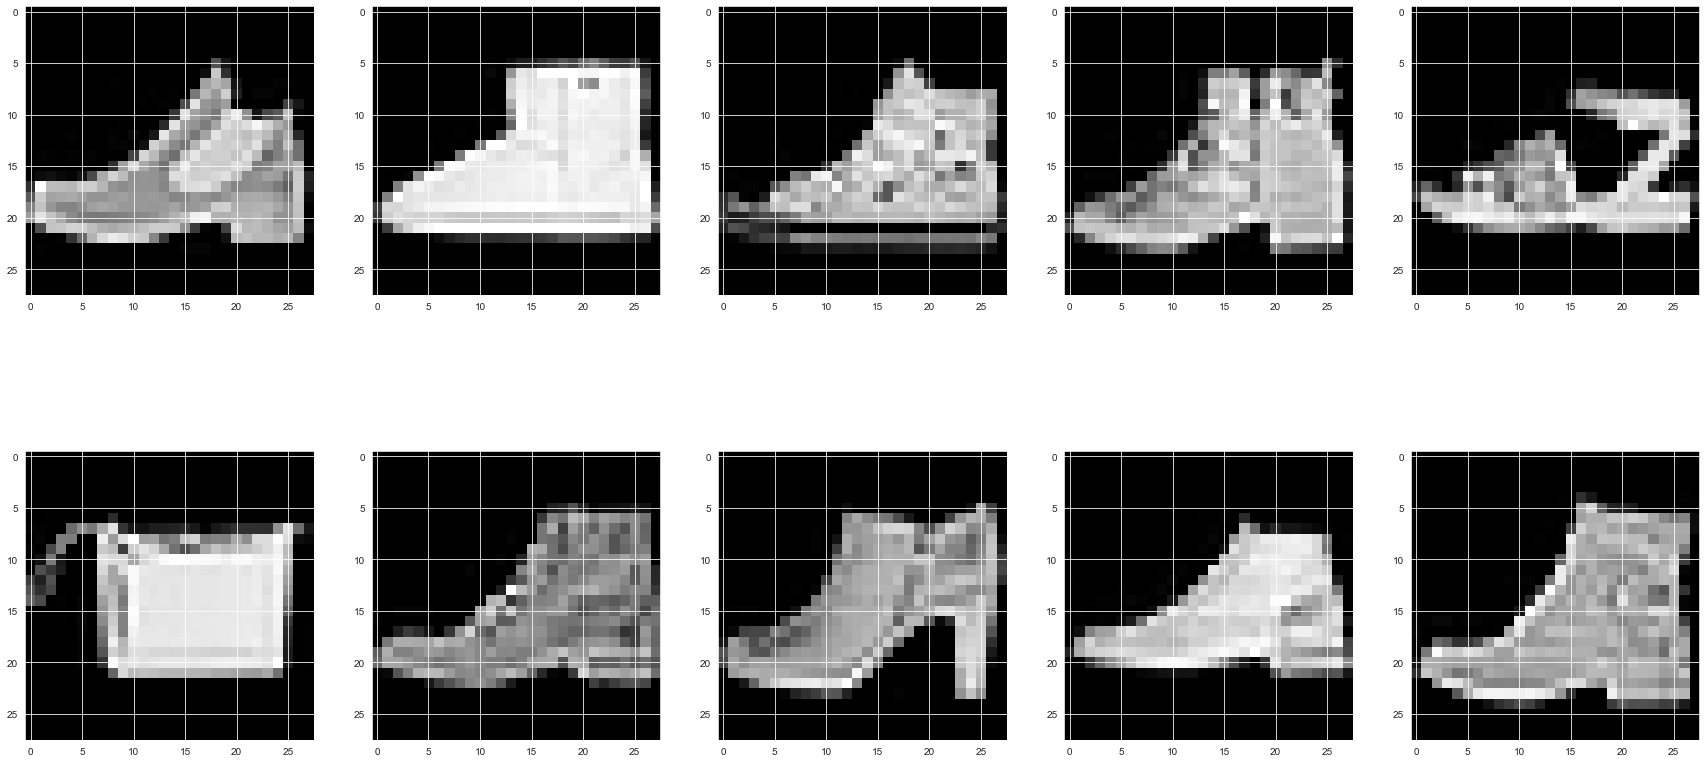

In [39]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 7][5*r + c].reshape(28,28,1), cmap = 'gray')

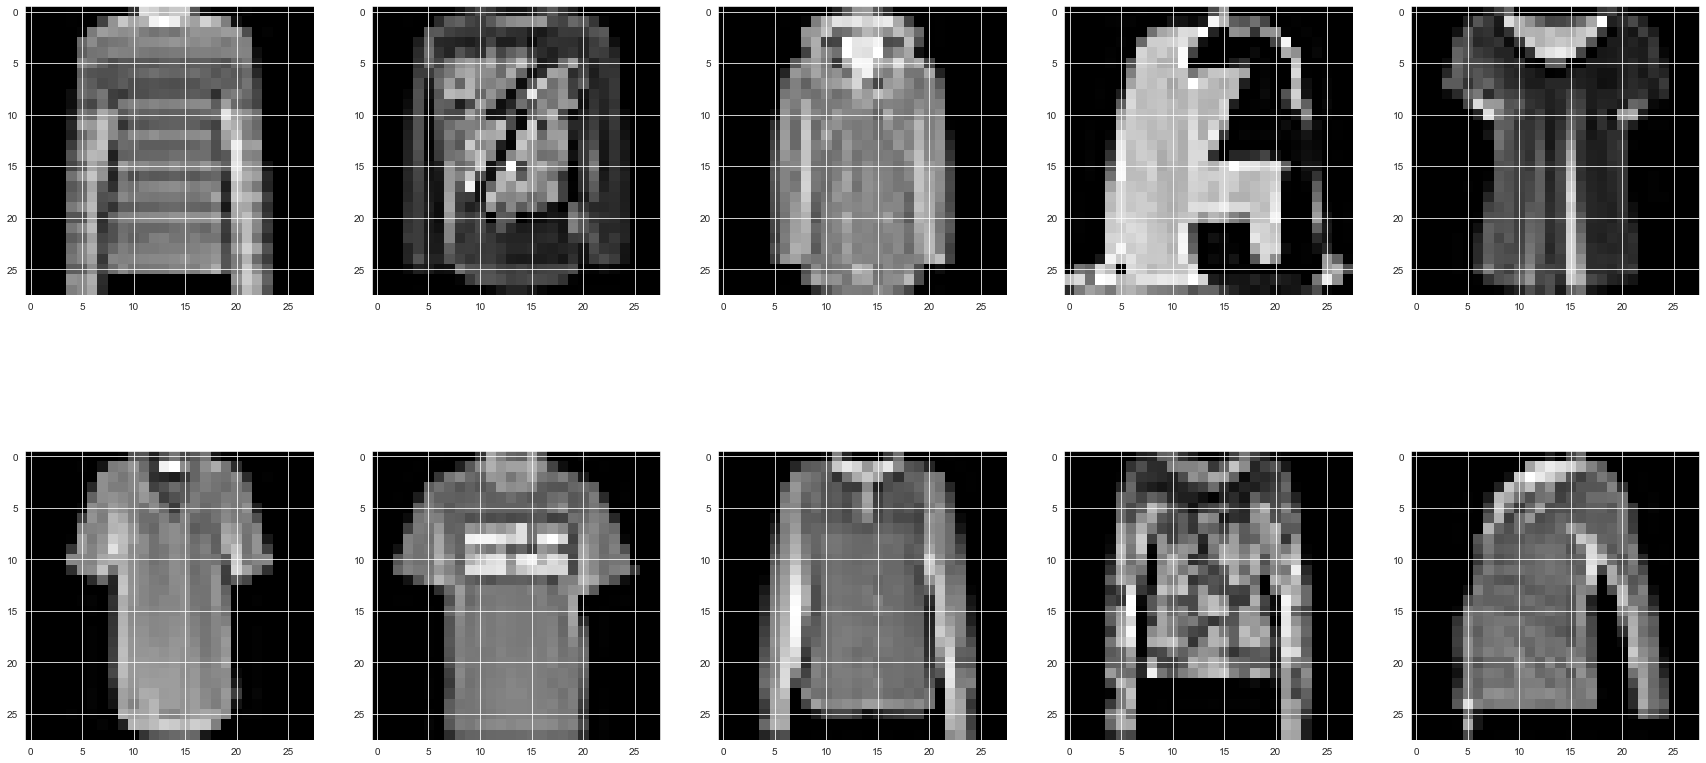

In [40]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 8][5*r + c].reshape(28,28,1), cmap = 'gray')

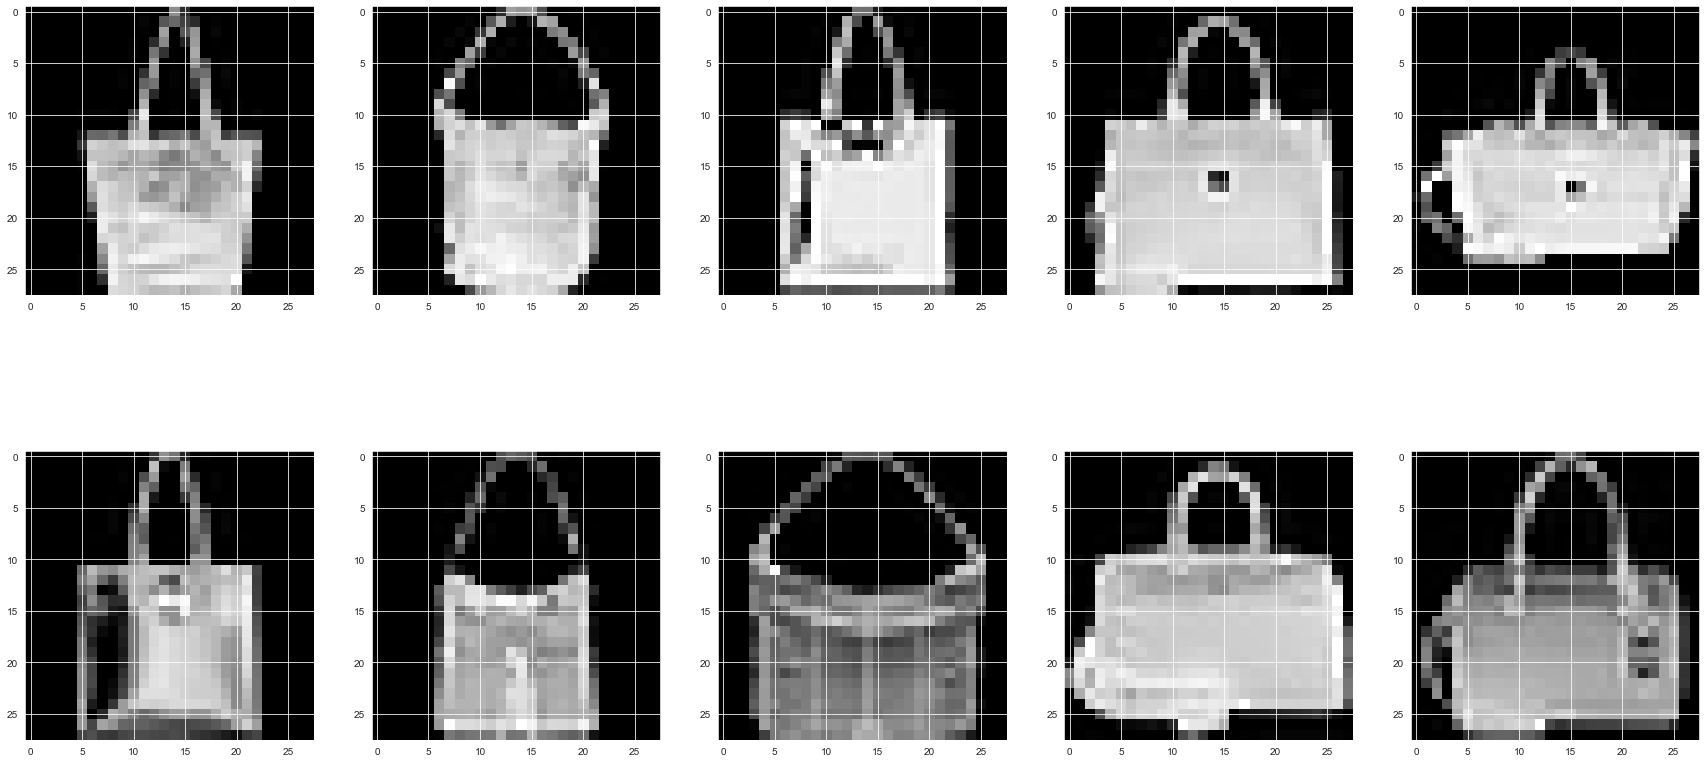

In [41]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 9][5*r + c].reshape(28,28,1), cmap = 'gray')

##### Part F

In [42]:
'''
Initialising Centroids for the Kmeans model
'''
InitialiseCentroids = np.array([X[df['label'].values==i][3000] for i in range(10)])

In [43]:
kMeansIni = kmeans(dis = 'euclidean',clusters = 10, centroids = InitialiseCentroids, Initialise = True)

In [44]:
kMeansIni.fit(X)

100%|██████████| 100/100 [15:14<00:00,  9.15s/it]


In [45]:
'''
Reporting points in each cluster
'''
for i in Counter(kMeansIni.vals):
    print('Cluster:',i,'==>',Counter(kMeansIni.vals)[i])

Cluster: 8.0 ==> 2349
Cluster: 7.0 ==> 5834
Cluster: 2.0 ==> 9759
Cluster: 0.0 ==> 3810
Cluster: 6.0 ==> 5189
Cluster: 5.0 ==> 7510
Cluster: 4.0 ==> 2558
Cluster: 1.0 ==> 7712
Cluster: 3.0 ==> 7772
Cluster: 9.0 ==> 7507


In [46]:
'''
Visualising Centroids
'''
'''
Reducing dimensionality of the Data to plot its 2D graph
'''
pc = decomposition.PCA(2)
pc.fit(X)
XPCA = pc.transform(X)
centroids = pc.transform(kMeansIni.centroids)

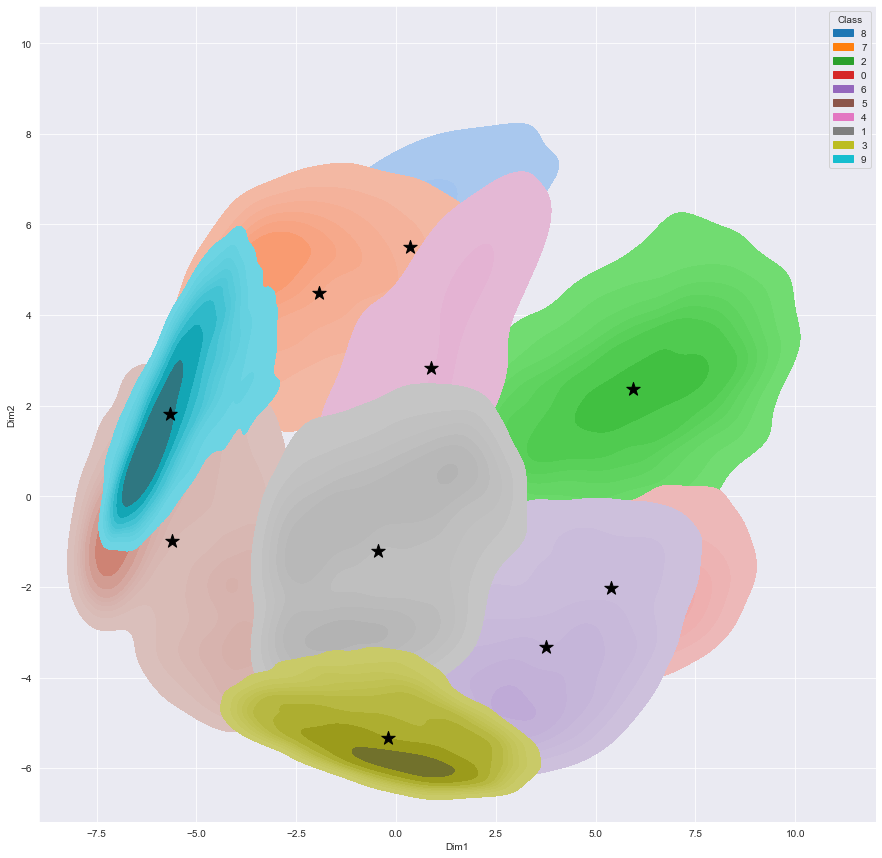

In [47]:
'''
Storing data in dataframe
'''
yPlot = kMeansIni.vals.copy()
y = list(kMeansIni.vals.copy())
for ix,i in enumerate(kMeansIni.vals):
    y[ix] = dicClasses[i]
'''
Plotting a KDE plot 
'''
dfPlot = pd.DataFrame()
dfPlot['Dim1'] = XPCA[:,0]
dfPlot['Dim2'] = XPCA[:,1]
dfPlot['Class'] = y
fig = plt.figure(figsize=(15,15))
sns.kdeplot(x = 'Dim1', y = 'Dim2',hue = 'Class', data = dfPlot, fill = True)
plt.scatter(x = centroids[:,0], y = centroids[:,1], c = 'black', s = 200, marker = '*')

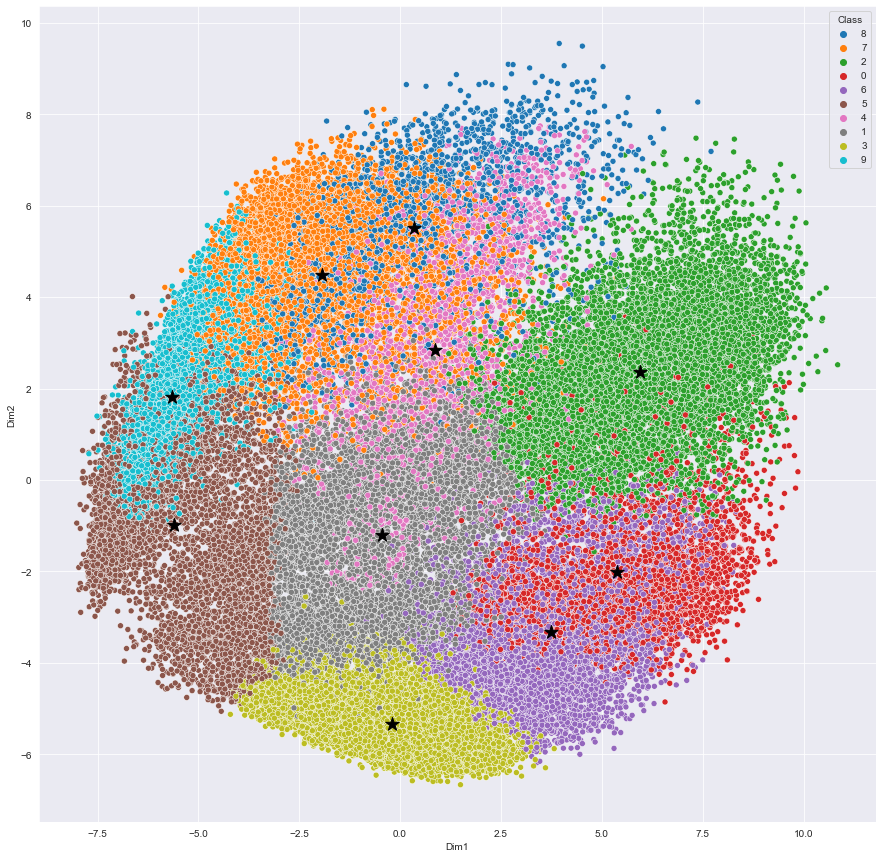

In [48]:
'''
Plotting a Scatter Plot
'''
fig = plt.figure(figsize=(15,15))
sns.scatterplot(x = 'Dim1', y = 'Dim2',hue = 'Class', data = dfPlot)
plt.scatter(x = centroids[:,0], y = centroids[:,1], c = 'black', s = 200, marker = '*')

##### Part G

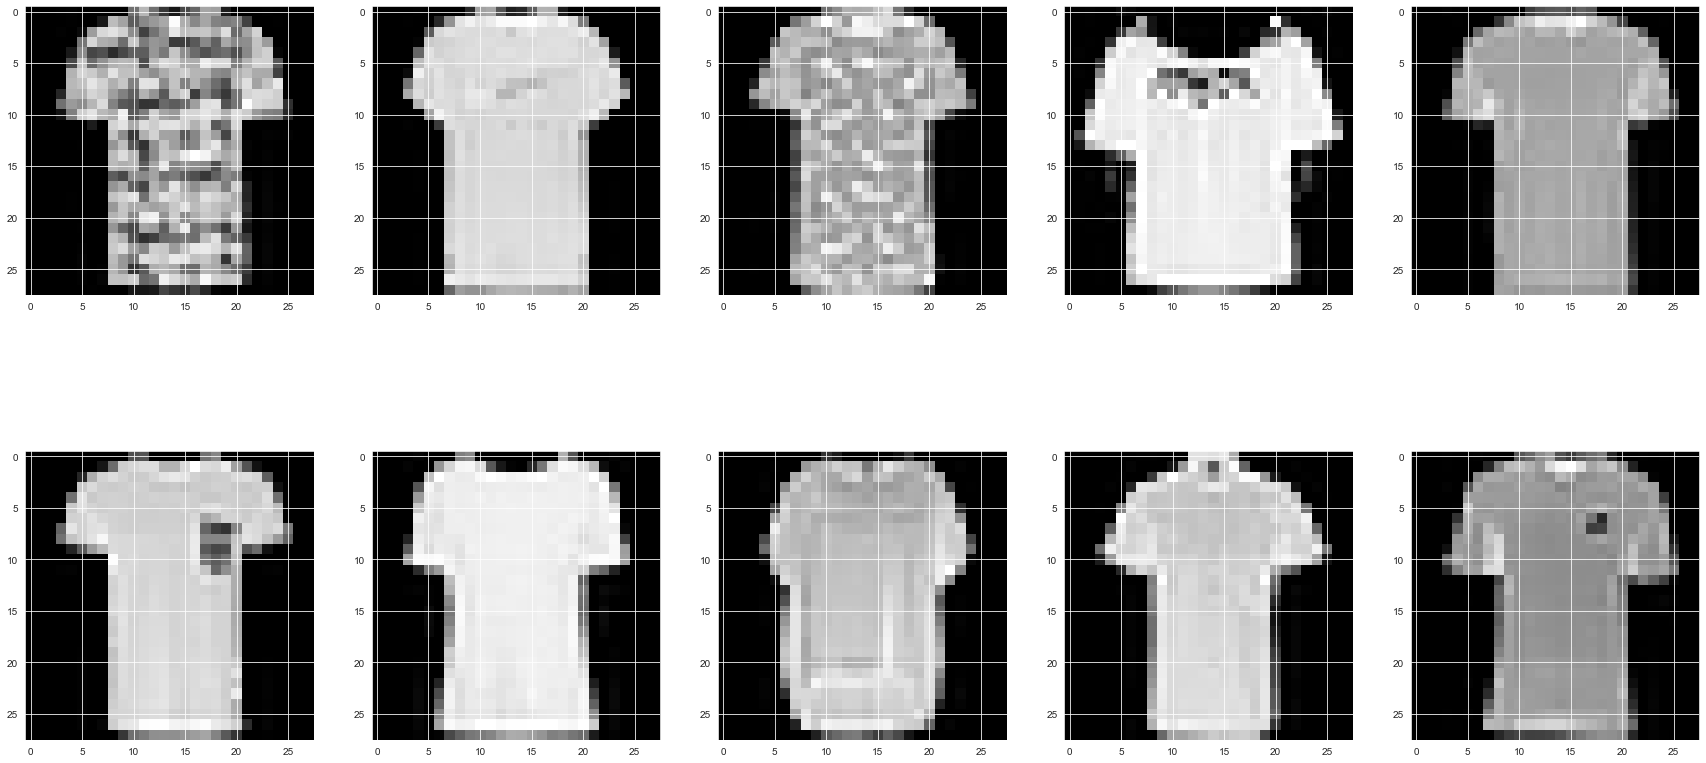

In [49]:
'''
Plotting 10 images corresponding to each cluster.
'''
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 0][5*r + c].reshape(28,28,1), cmap = 'gray')

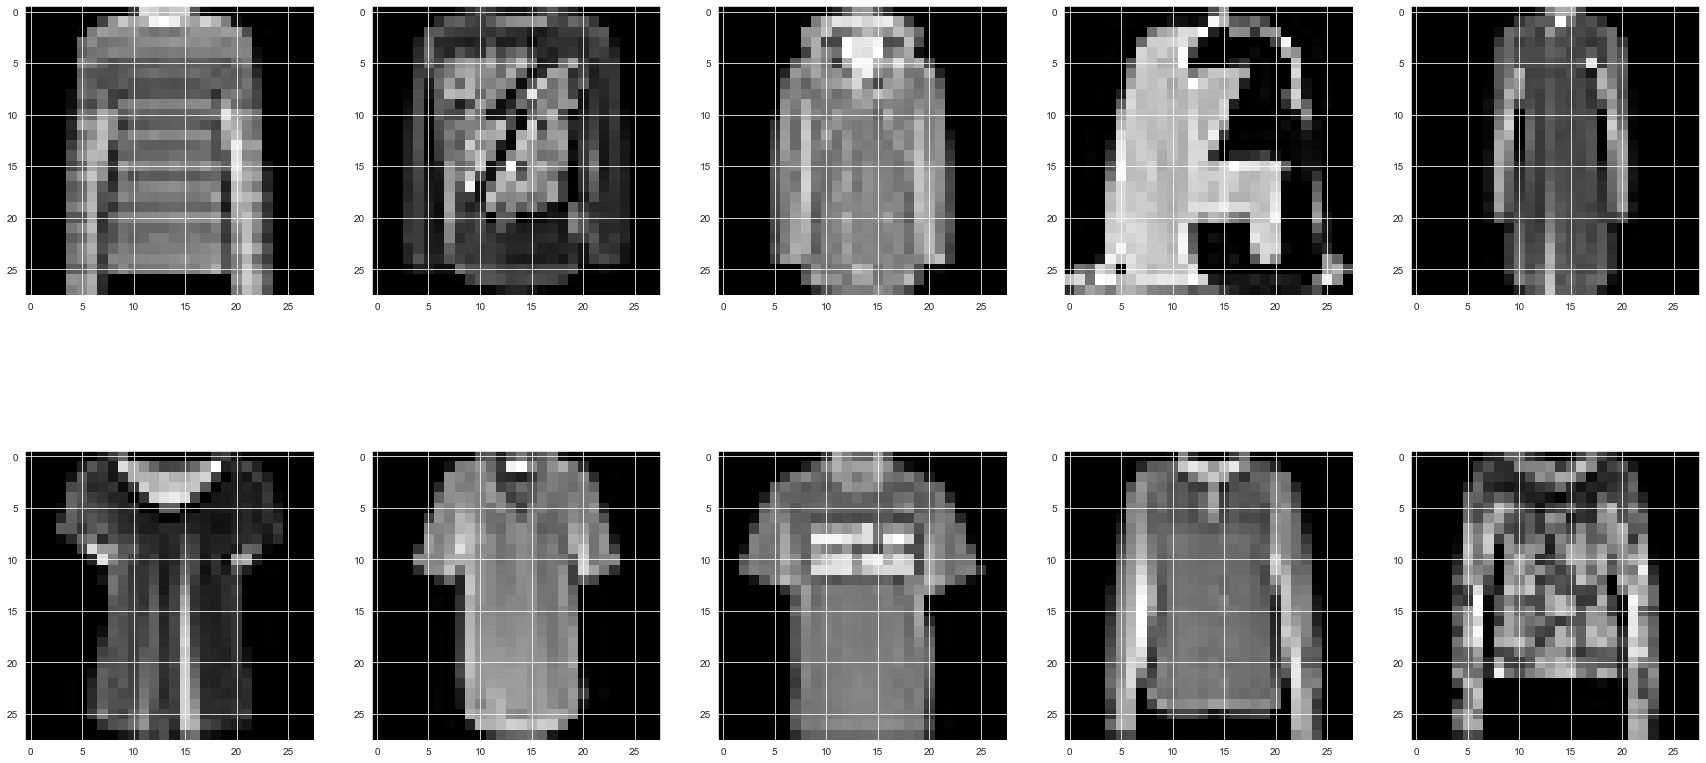

In [50]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 1][5*r + c].reshape(28,28,1), cmap = 'gray')

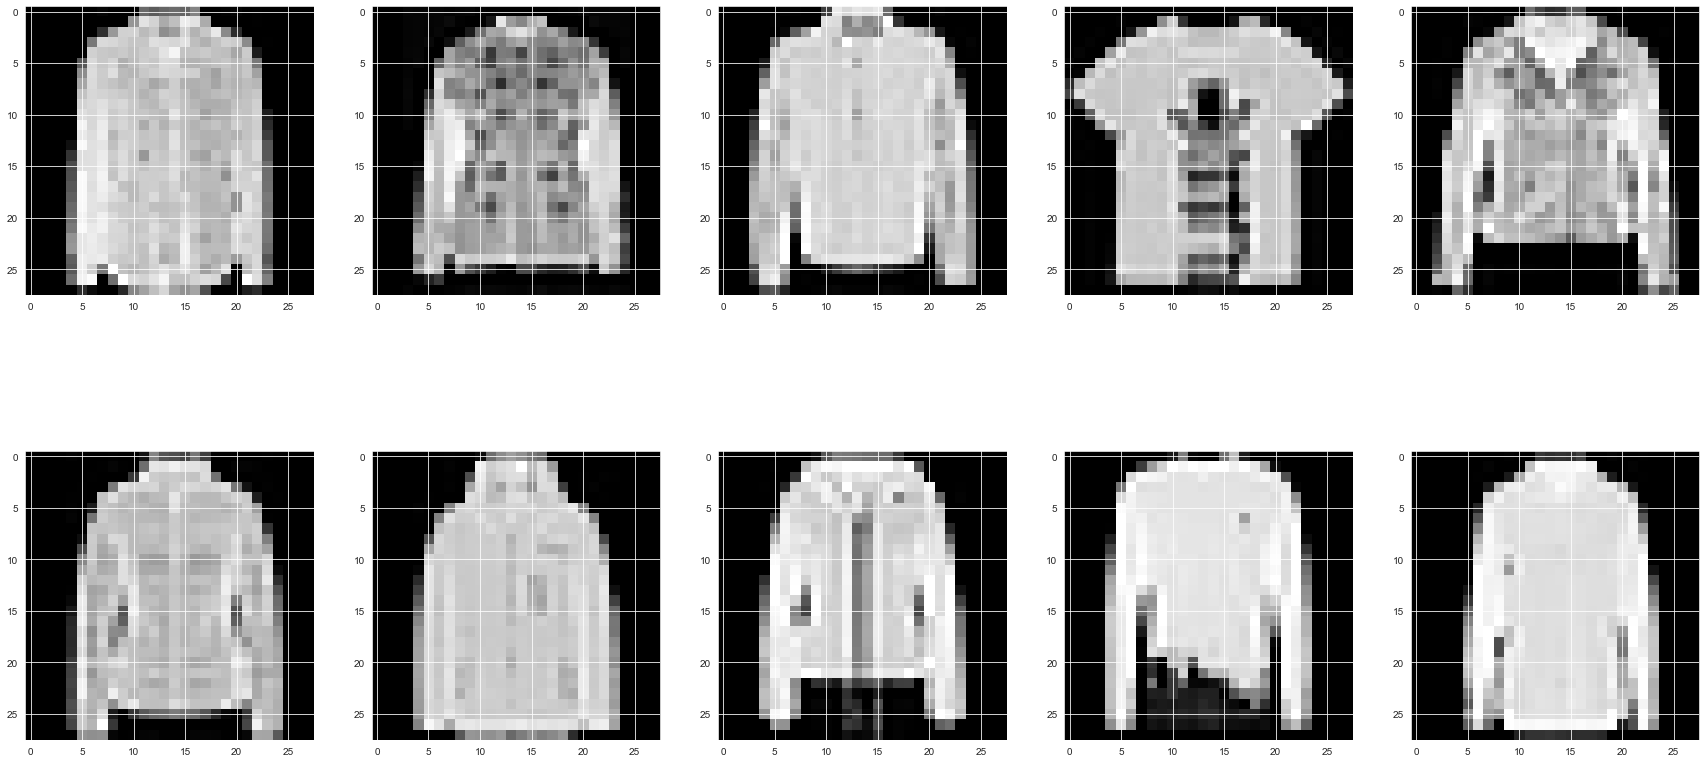

In [51]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 2][5*r + c].reshape(28,28,1), cmap = 'gray')

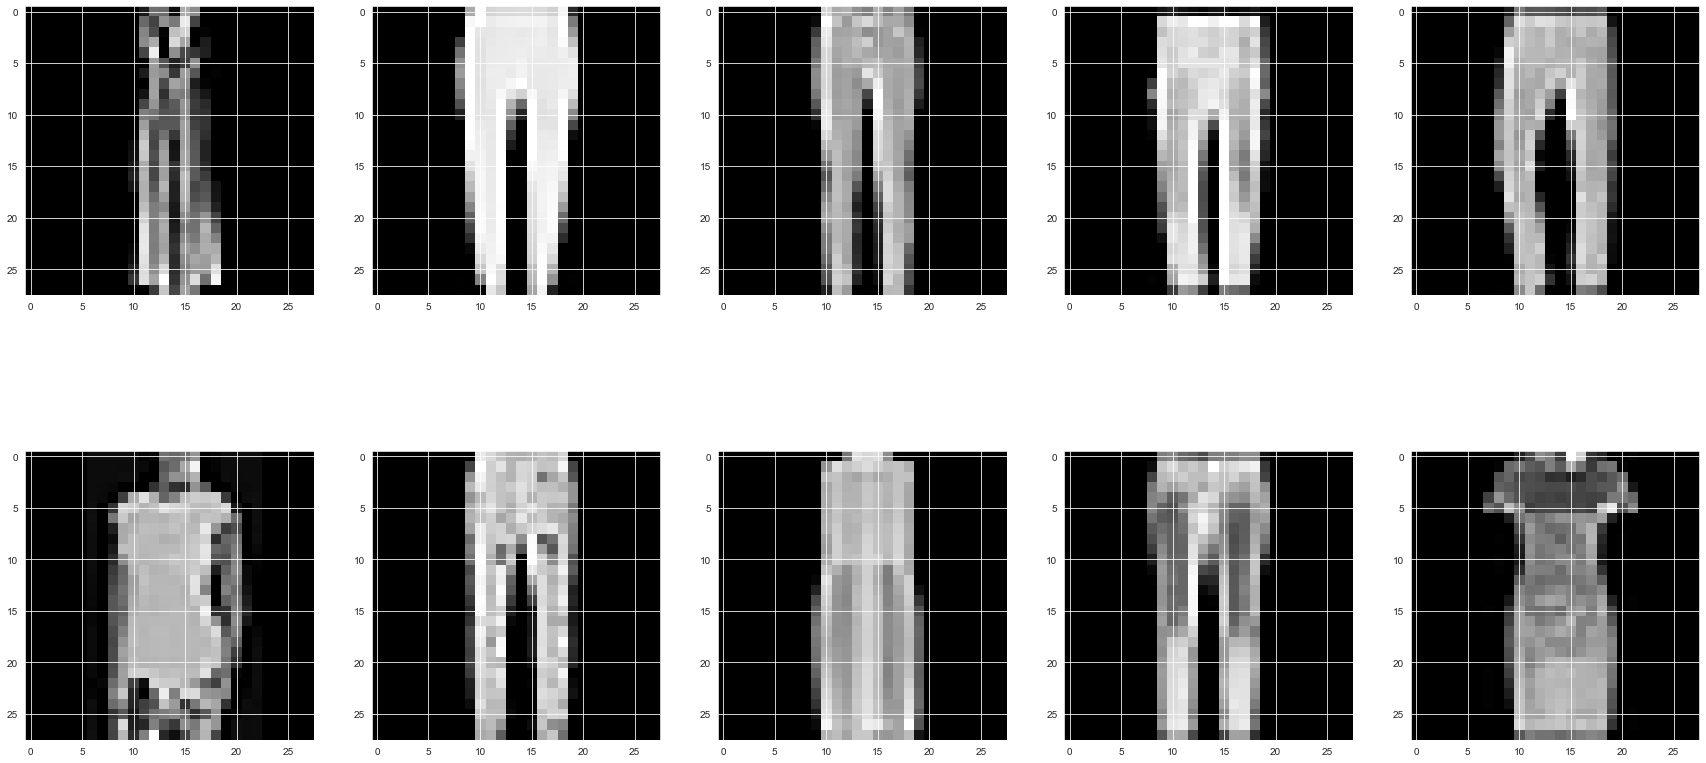

In [52]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 3][5*r + c].reshape(28,28,1), cmap = 'gray')

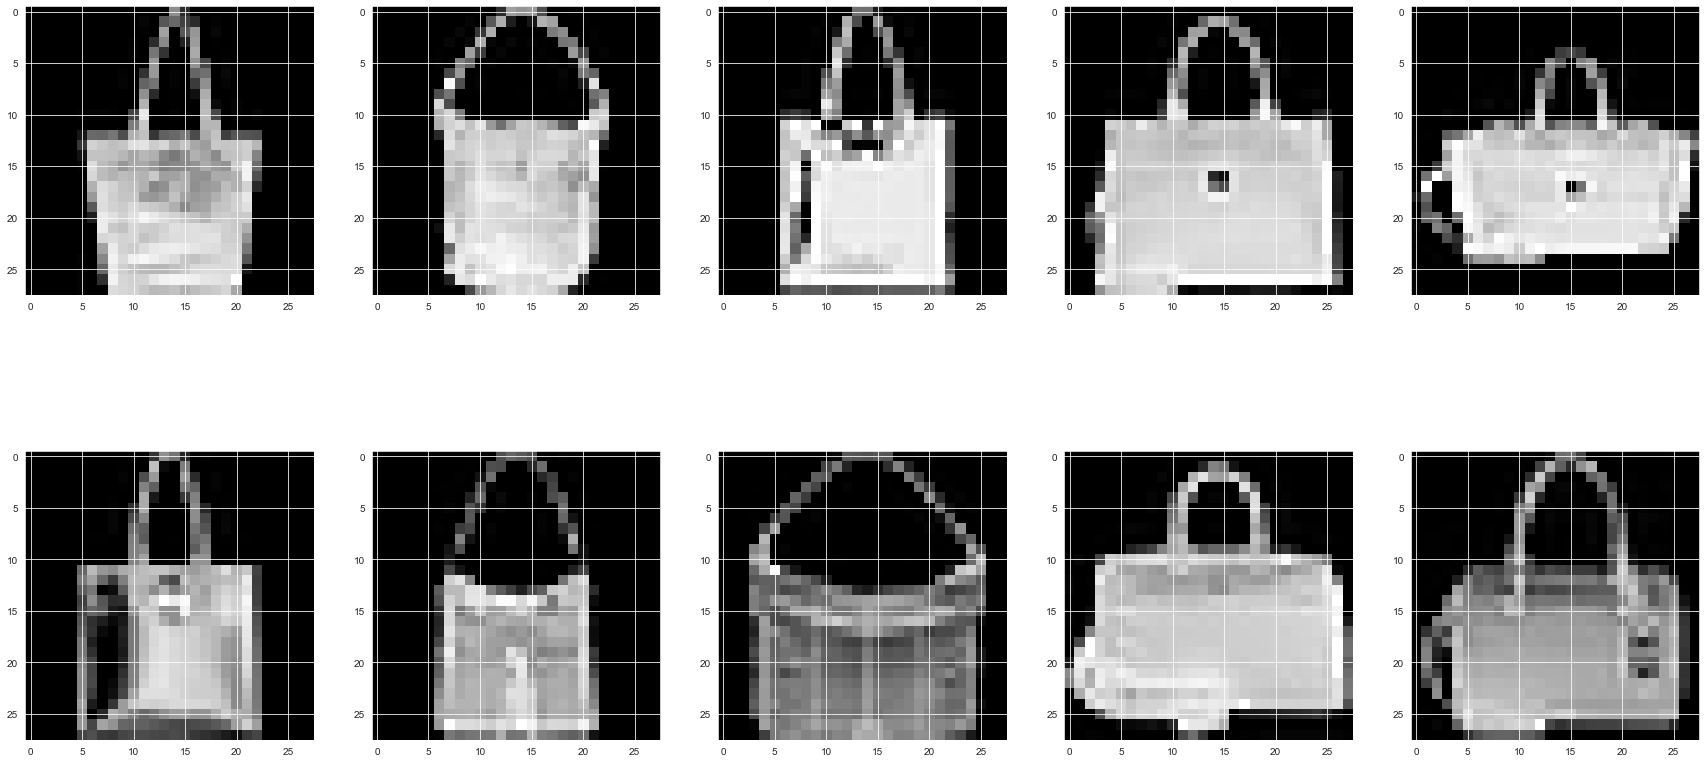

In [53]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 4][5*r + c].reshape(28,28,1), cmap = 'gray')

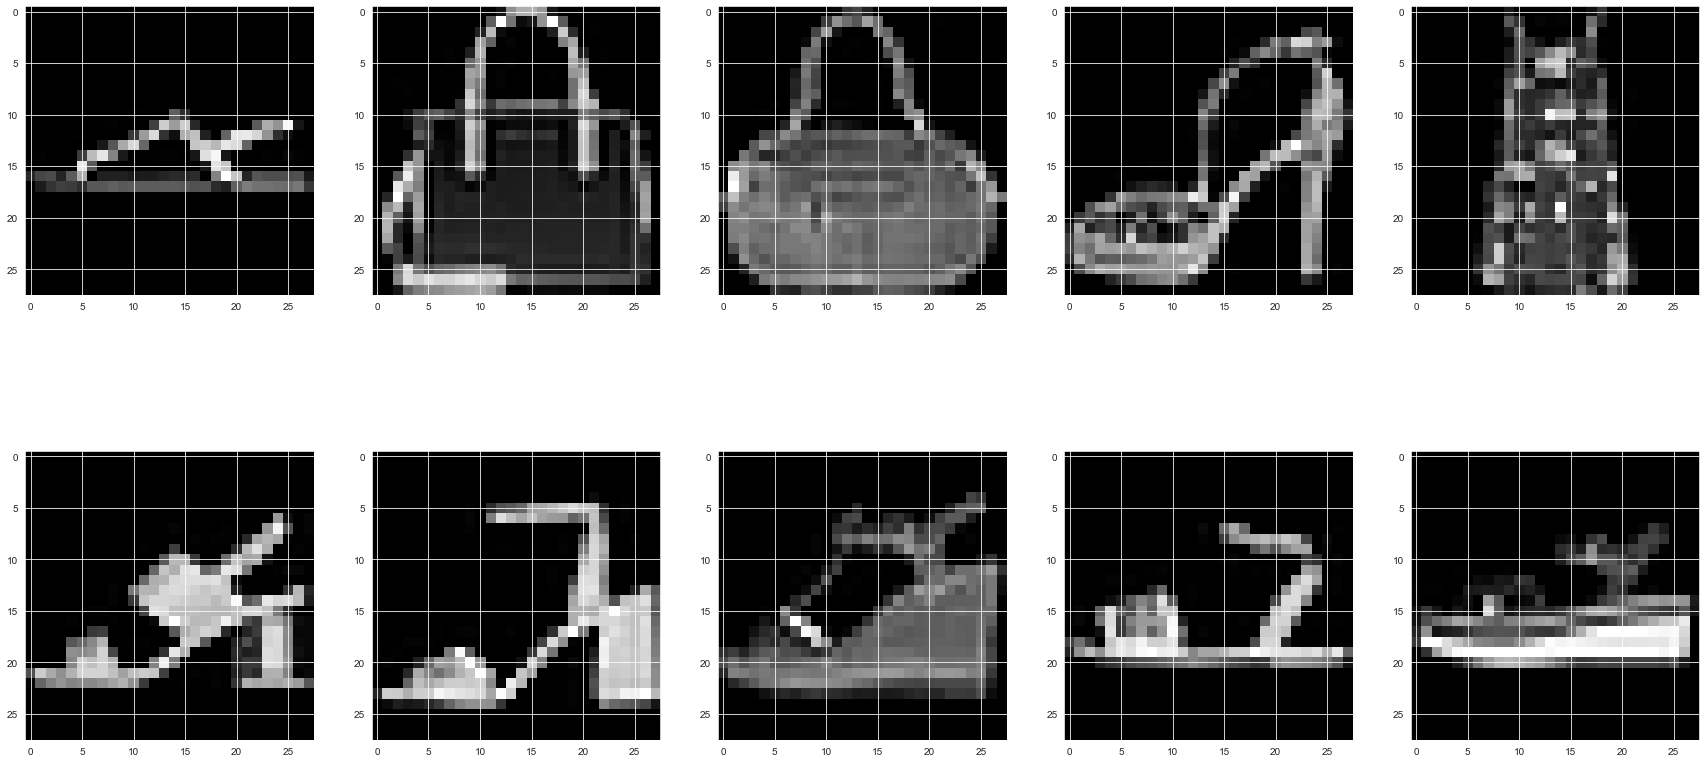

In [54]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 5][5*r + c].reshape(28,28,1), cmap = 'gray')

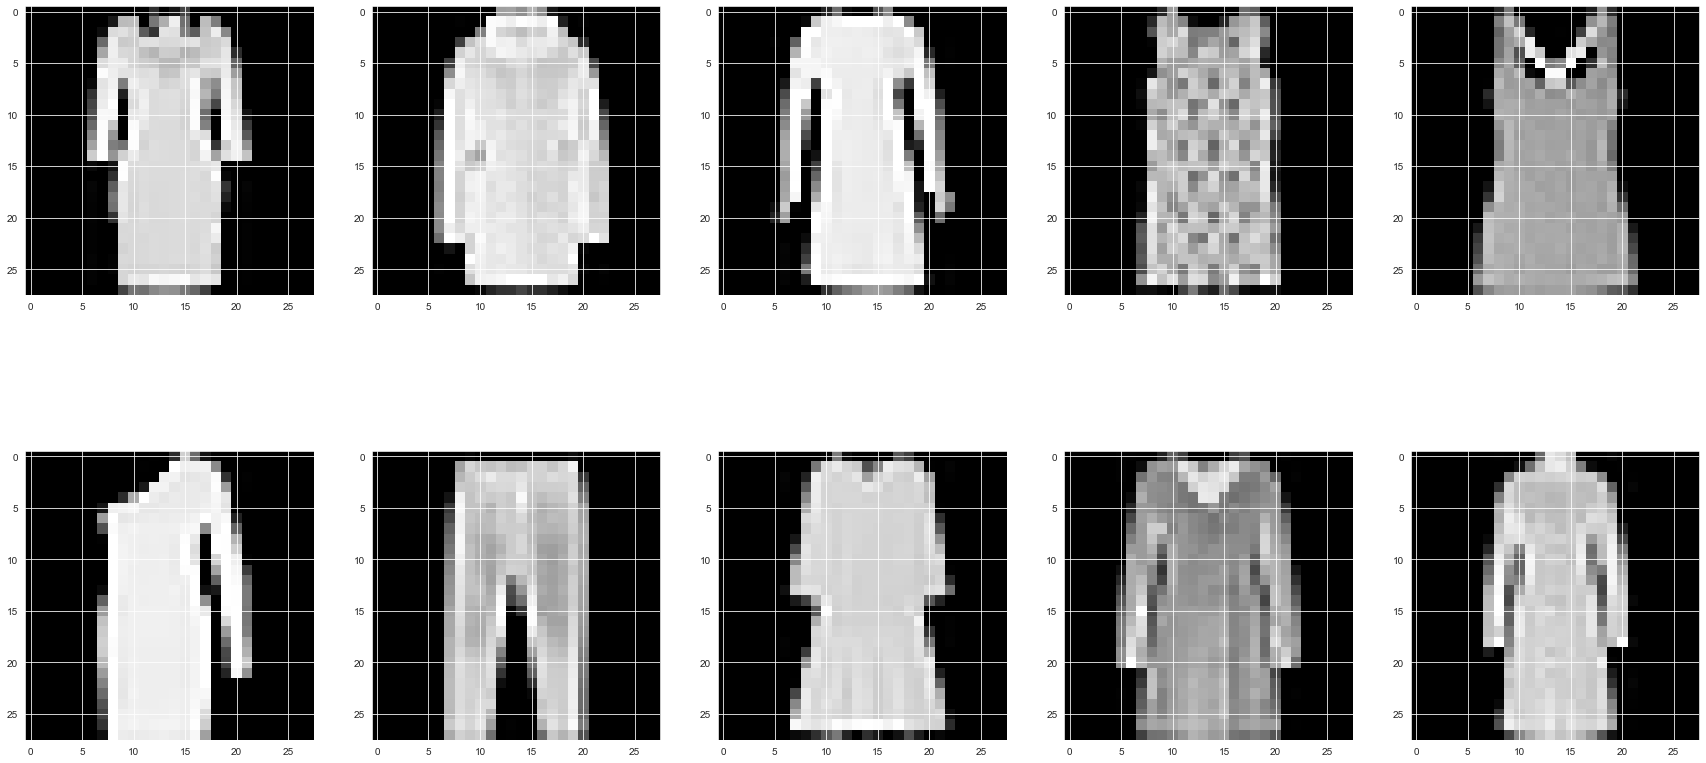

In [55]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 6][5*r + c].reshape(28,28,1), cmap = 'gray')

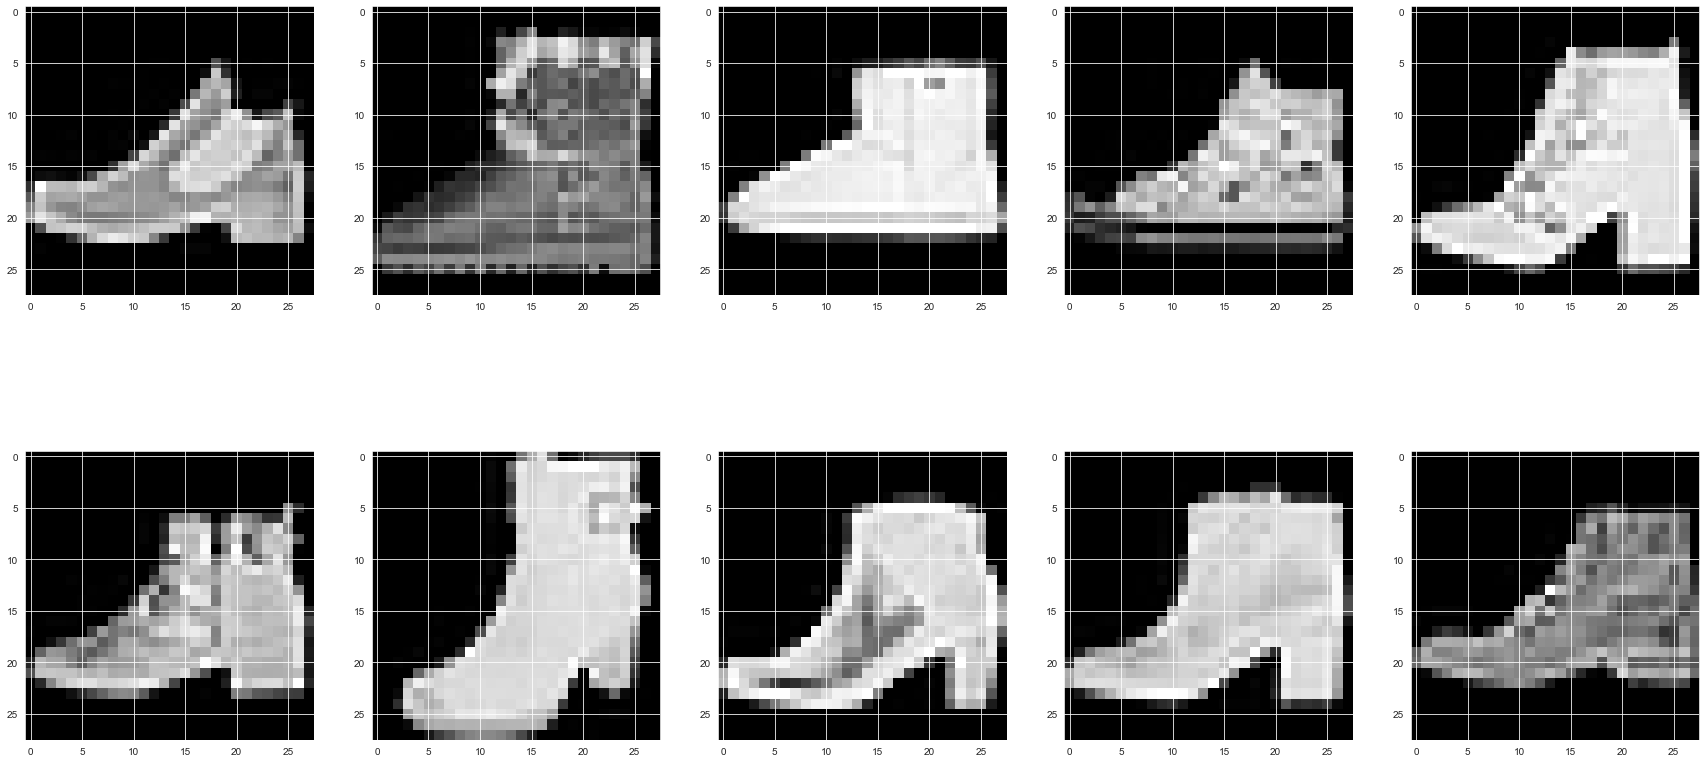

In [56]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 7][5*r + c].reshape(28,28,1), cmap = 'gray')

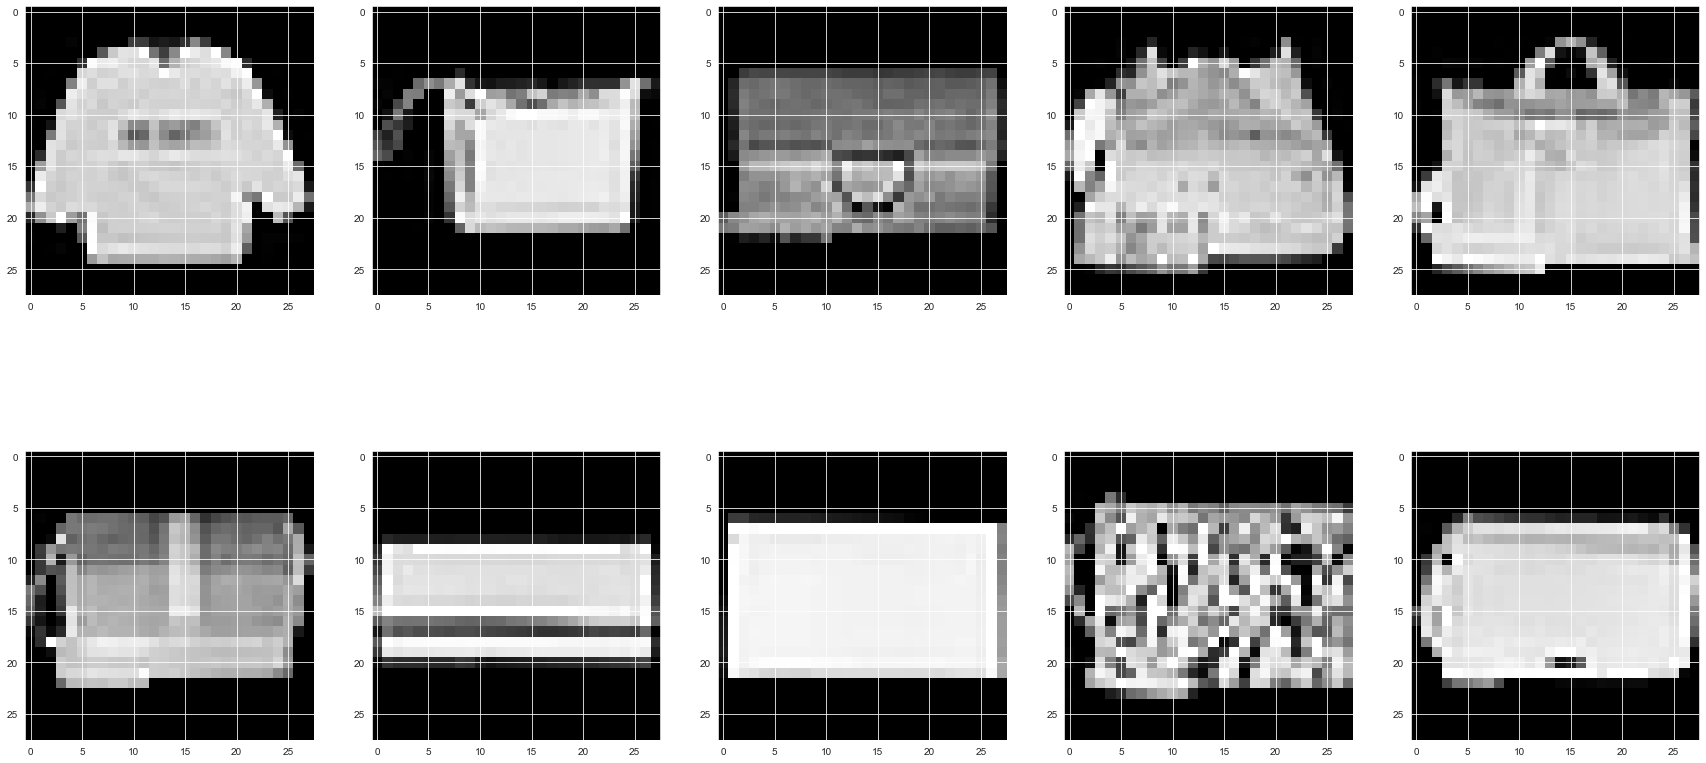

In [57]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 8][5*r + c].reshape(28,28,1), cmap = 'gray')

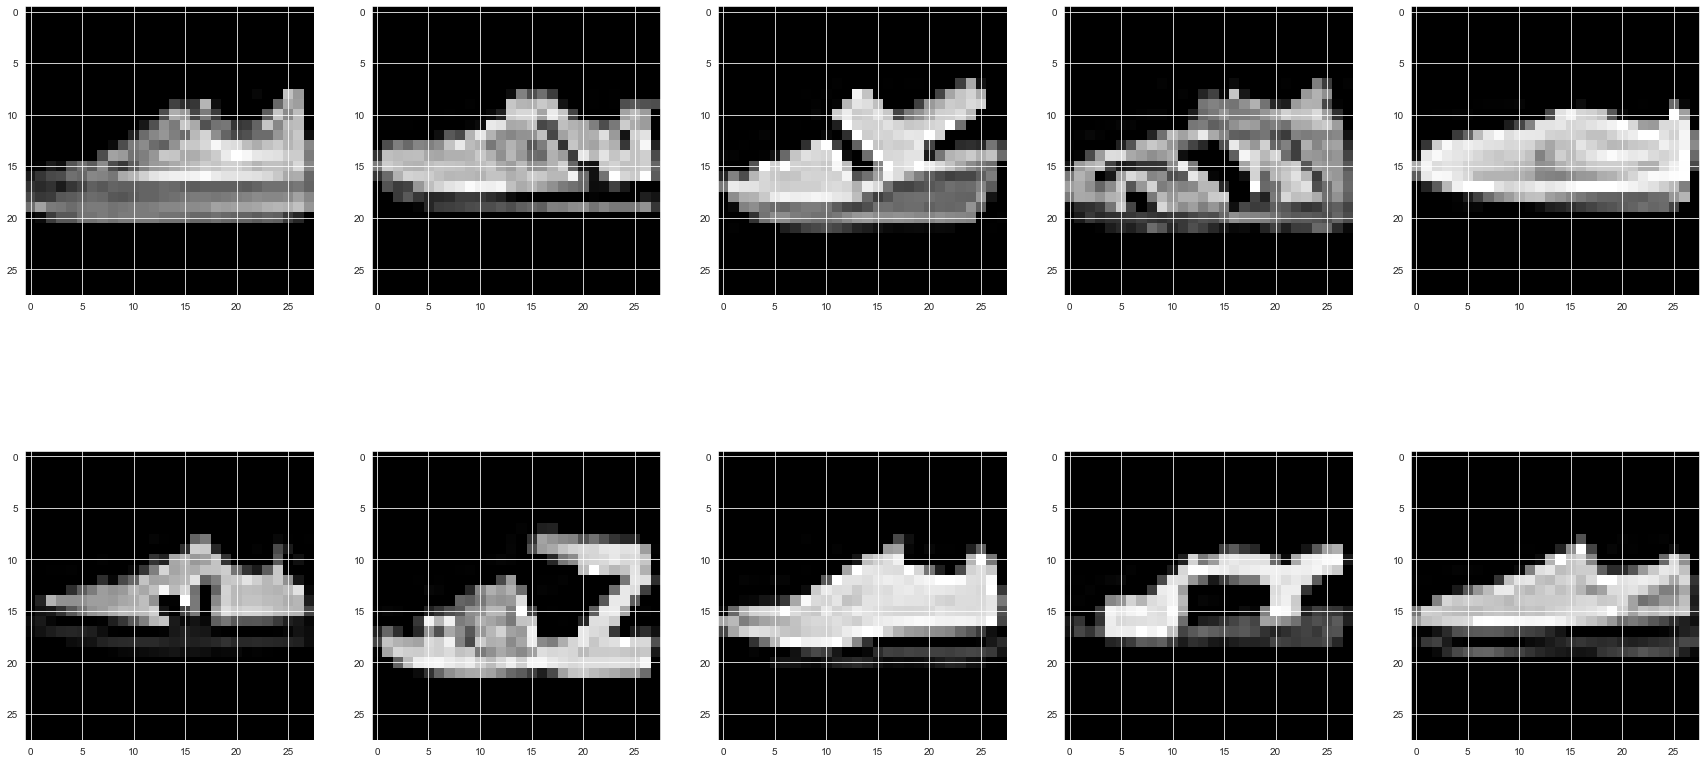

In [58]:
fig, axes = plt.subplots(2,5,figsize=(30,15))
for r in range(2):
    for c in range(5):
        axes[r][c].imshow(X[yPlot == 9][5*r + c].reshape(28,28,1), cmap = 'gray')

##### Part H

In [59]:
'''
Calculating mse for each cluster for both the models
'''
sseRandom = []
sseIni = []
for i in range(0,10):
    sseRandom.append(kMeans.SSE_cluster(i))
    sseIni.append(kMeansIni.SSE_cluster(i))

<AxesSubplot:xlabel='Clusters', ylabel='SSE_Initialised'>

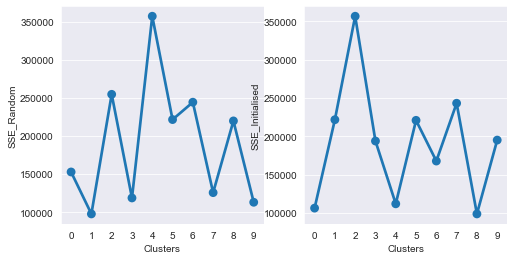

In [60]:
'''
Plotting the SSE's reported
'''
dfPlot = pd.DataFrame()
dfPlot['Clusters'] = [i for i in range(10)]
dfPlot['SSE_Random'] = sseRandom
dfPlot['SSE_Initialised'] = sseIni
fig, axes = plt.subplots(1,2, figsize=(8,4))
sns.pointplot(x = 'Clusters', y = 'SSE_Random', data = dfPlot, ax = axes[0])
sns.pointplot(x = 'Clusters', y = 'SSE_Initialised', data = dfPlot, ax = axes[1])

In [81]:
'''
Calculating sum of SSE's
'''
SSE_si = np.sum(np.array(sseRandom))
SSE_sr = np.sum(np.array(sseIni))
print('SSE --> Initialised -->',SSE_si)
print('SSE --> Random -->',SSE_sr)

#Results for both the models are almost similar with Initialised centroids approach peforming slightly better


SSE --> Initialised --> 1905636.6901235175
SSE --> Random --> 1915335.1297465428


## Question 3

In [2]:
'''
Collecting images of the yes category
'''
yes_no = []
mypath = 'C:/Users/ASUS/Desktop/Codes/ML_Lab/Lab9/yes'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for ix,file in enumerate(onlyfiles):
    if ix == 1500:
        break
    img = cv.imread(mypath+'/'+file,0)
    img = cv.resize(img,(100,100))
    yes_no.append(img)

In [3]:
'''
Collecting images of the no category
'''
mypath = 'C:/Users/ASUS/Desktop/Codes/ML_Lab/Lab9/no'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for ix,file in enumerate(onlyfiles):
    if ix == 1500:
        break
    img = cv.imread(mypath+'/'+file,0)
    img = cv.resize(img,(100,100))
    yes_no.append(img)
yes_no = np.array(yes_no)

In [4]:
'''
Reshaping Data collected
'''
yes_no = yes_no.reshape(3000,10000)

In [5]:
'''
Storing it in a dataframe
'''
dfBrain = pd.DataFrame(yes_no)
dfBrain.columns =['Pixel'+str(i+1) for i in range(10000)]
dfBrain['Class'] = [1 if i < 1500 else 0 for i in range(3000)]

In [6]:
'''
Scaling Data
'''
dfBrain_ = dfBrain.copy()
dfBrain.iloc[:,:-1] = preprocessing.StandardScaler().fit_transform(dfBrain.iloc[:,:-1])

##### Part B

In [7]:
pca = decomposition.PCA(2)
XTemp3 = pca.fit_transform(dfBrain.iloc[:,:-1])
dfPCA3 = pd.DataFrame(XTemp3)
dfPCA3.columns = ['PC1','PC2']
XTemp3_ = pca.fit_transform(dfBrain_.iloc[:,:-1])
dfPCA3_ = pd.DataFrame(XTemp3_)
dfPCA3_.columns = ['PC1','PC2']  

In [8]:
'''
Removing some outliers
'''
rows2Delete = list(np.where(dfPCA3['PC2'] > 150)[0])
rows2Delete.extend(list(np.where(dfPCA3['PC1'] > 150)[0]))

In [9]:
'''
Removing Selected Rows
'''
for row in rows2Delete:
    dfPCA3.drop(row, inplace=True)
    dfBrain.drop(row, inplace=True)
    dfPCA3_.drop(row, inplace=True)
dfPCA3.reset_index(drop = True, inplace=True)
dfBrain.reset_index(drop = True, inplace=True)
dfPCA3_.reset_index(drop = True, inplace=True)

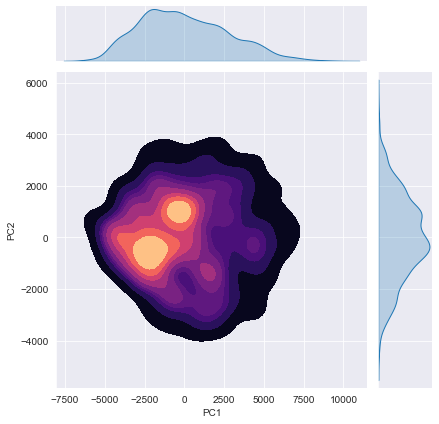

In [70]:
'''
Visualising without scaling
'''
sns.jointplot(x = 'PC1', y = 'PC2', kind = 'kde',data  = dfPCA3_, cmap = 'magma',fill = True)

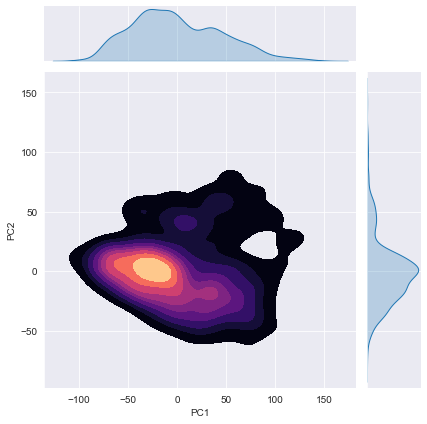

In [71]:
'''
Visualising with scaling
'''
sns.jointplot(x = 'PC1', y = 'PC2', kind = 'kde',data  = dfPCA3, cmap = 'magma',fill = True)

<AxesSubplot:xlabel='Clusters', ylabel='Silhouette Score'>

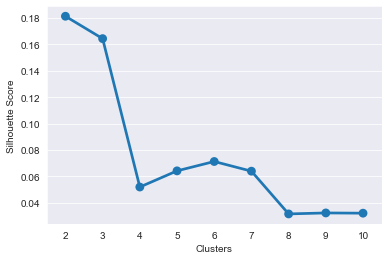

In [36]:
clusters = [i+1 for i in range(1,10)]
results = []
for i in clusters:
  kmeans = cluster.KMeans(n_clusters = i)
  y_kmeans = kmeans.fit_predict(np.array(dfBrain.iloc[:,:-1]))
  results.append(Si_score(dfBrain.iloc[:,:-1],y_kmeans))
dfResults = pd.DataFrame()
dfResults['Clusters'] = clusters
dfResults['Silhouette Score'] = results
sns.pointplot(x = 'Clusters', y = 'Silhouette Score', data = dfResults)

##### Part C

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

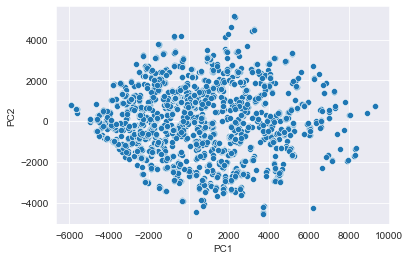

In [72]:
'''
Visualising communites from Part A through Scatter Plot without scaling
'''
sns.scatterplot(x = 'PC1', y = 'PC2',data  = dfPCA3_, cmap = 'magma')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

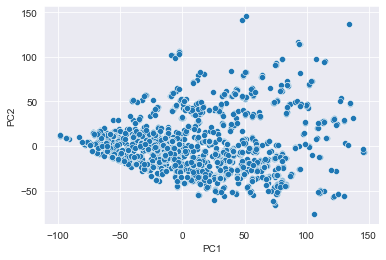

In [73]:
'''
Visualising communites from Part A through Scatter Plot with scaling
'''
sns.scatterplot(x = 'PC1', y = 'PC2',data  = dfPCA3, cmap = 'magma')

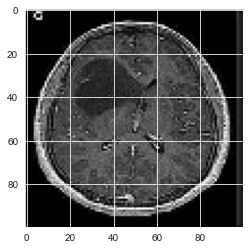

In [74]:
'''
Plotting image from Cluster 1
'''
plt.imshow(yes_no[300].reshape(100,100), cmap = 'gray')

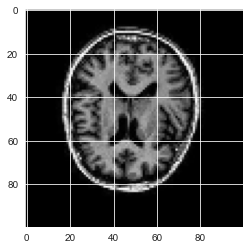

In [75]:
'''
Plotting image from Cluster 2
'''
plt.imshow(yes_no[2700].reshape(100,100), cmap = 'gray')

##### Part D

In [30]:
'''
Training Agglomerative hierarchical clustering model
'''
agglClusterModel = cluster.AgglomerativeClustering(2)
agglClusterModel.fit(dfBrain.iloc[:,:-1].values)

AgglomerativeClustering()

In [31]:
'''
Training Kmeans model
'''
kmeansModel = cluster.KMeans(2)
kmeansModel.fit(dfBrain.iloc[:,:-1].values)

KMeans(n_clusters=2)

In [38]:
'''
Storing labels from both the Models
'''
yAgg = agglClusterModel.labels_
yKmeans = kmeansModel.labels_
original = np.array([0 if i == 1 else 1 for i in dfBrain['Class']])

In [40]:
yKmeans = np.array([0 if i == 1 else 1 for i in yKmeans])

<AxesSubplot:title={'center':'Original Class'}, xlabel='Dim1', ylabel='Dim2'>

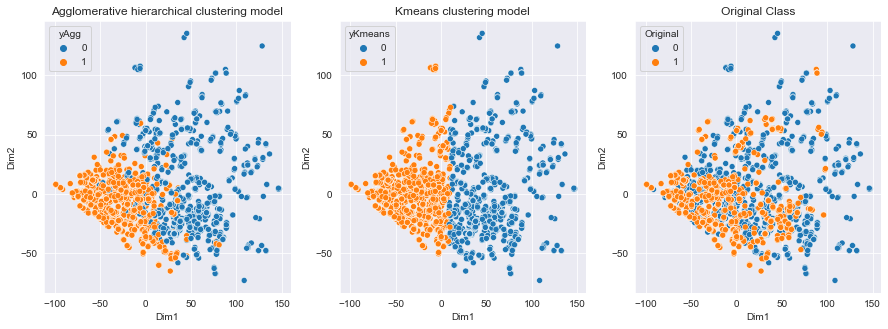

In [41]:
'''
Visualising both the results
'''
dfPlot = pd.DataFrame()
dfPlot[['Dim1','Dim2']] = pca.fit_transform(dfBrain.iloc[:,:-1])
dfPlot['yAgg'] = yAgg
dfPlot['yKmeans'] = yKmeans
dfPlot['Original'] = original
fig, axes = plt.subplots(1,3 , figsize=(15,5))
sns.scatterplot(x = 'Dim1', y = 'Dim2',hue = 'yAgg',data  = dfPlot, ax = axes[0])
axes[0].set_title('Agglomerative hierarchical clustering model')
axes[1].set_title('Kmeans clustering model')
axes[2].set_title('Original Class')
sns.scatterplot(x = 'Dim1', y = 'Dim2',hue = 'yKmeans',  data  = dfPlot, ax = axes[1])
sns.scatterplot(x = 'Dim1', y = 'Dim2',hue ='Original', data = dfPlot, ax = axes[2])


In [42]:
'''
Accuracy Results
'''
print("F1 Score KNN's =>",metrics.f1_score(original, yKmeans))
print("F1 Score Agglo's =>",metrics.f1_score(original, yAgg))

F1 Score KNN's => 0.6959116681587586
F1 Score Agglo's => 0.704


## -Piyush Arora (B20CS086)